In [1]:
#Qx = Questions I asked
#Tx = Trends found/investigated
#Cx = Conclusions made

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
train_path = '/Users/Pewelix/Documents/Data_Science/KKBox_Challenge/train_v2.csv'
trn = pd.read_csv(train_path)

In [6]:
#Q1: What are the contents of the given train file
trn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970960 entries, 0 to 970959
Data columns (total 2 columns):
msno        970960 non-null object
is_churn    970960 non-null int64
dtypes: int64(1), object(1)
memory usage: 14.8+ MB


In [10]:
trn.describe()

,is_churn
count,970960.000000
mean,0.089942
std,0.286099
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [11]:
trn.columns

Index(['msno', 'is_churn'], dtype='object')

In [12]:
#Q2: Are there any duplicate items
trn.duplicated().sum()

0

In [13]:
trn.head()

,msno,is_churn
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1


In [14]:
trn['msno'].describe()

count                                           970960
unique                                          970960
top       UdxY52T0qXKYutj2w9NbTPoPL2acpRuSXbTwz95ZPps=
freq                                                 1
Name: msno, dtype: object

In [44]:
#Q3: How many people churned/did not churn
c = trn[trn['is_churn'] == 0]
nc = trn[trn['is_churn'] == 1]
x = c.count()
y = nc.count()
print(x)
print(y)

msno        883630
is_churn    883630
dtype: int64
msno        87330
is_churn    87330
dtype: int64


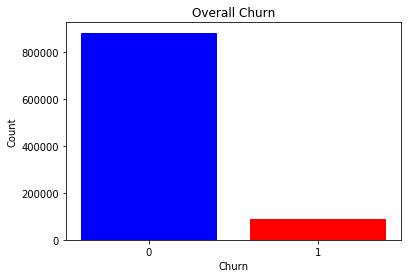

In [46]:
#C1: Most members in hte provided data set have NOT churned 
N=2
ind = np.arange(N)
y=[883630, 87330]
graph = plt.bar(ind, y)
plt.xticks([0,1])
graph[0].set_color('b')
graph[1].set_color('r')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Overall Churn')
plt.show()

In [8]:
#Q4: What are the contents of the given members file
members_path = '/Users/Pewelix/Documents/Data_Science/KKBox_Challenge/members_v3.csv'
mbrs = pd.read_csv(members_path)

In [4]:
mbrs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6769473 entries, 0 to 6769472
Data columns (total 6 columns):
msno                      object
city                      int64
bd                        int64
gender                    object
registered_via            int64
registration_init_time    int64
dtypes: int64(4), object(2)
memory usage: 309.9+ MB


In [5]:
mbrs.describe()

,city,bd,registered_via,registration_init_time
count,6.769473e+06,6.769473e+06,6.769473e+06,6.769473e+06
mean,3.847358e+00,9.795794e+00,5.253069e+00,2.014518e+07
std,5.478359e+00,1.792590e+01,2.361398e+00,2.318601e+04
min,1.000000e+00,-7.168000e+03,-1.000000e+00,2.004033e+07
25%,1.000000e+00,0.000000e+00,4.000000e+00,2.014042e+07
50%,1.000000e+00,0.000000e+00,4.000000e+00,2.015101e+07
75%,4.000000e+00,2.100000e+01,7.000000e+00,2.016060e+07
max,2.200000e+01,2.016000e+03,1.900000e+01,2.017043e+07


In [6]:
mbrs.columns

Index(['msno', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time'],
      dtype='object')

In [8]:
#Q5: Are there any missing variables
mbrs.isnull().sum()

msno                            0
city                            0
bd                              0
gender                    4429505
registered_via                  0
registration_init_time          0
dtype: int64

In [11]:
mbrs.duplicated().sum()

0

In [31]:
df = mbrs['city']
np.unique(df, return_counts=True)

(array([ 1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19, 20, 21, 22]),
 array([4804326,   27282,  246848,  385069,  135200,   11610,   45975,
          47639,   32482,   47489,   66843,  320978,   89940,  190213,
           5092,   27772,   38039,    1199,    4233,   30837,  210407]))

In [36]:
df = np.unique(df)

In [42]:
df.size

21

In [23]:
city = mbrs.groupby('city').agg('count')
city['ratio'] = round((city['msno'] / 6769473) * 100, 2)
city

,msno,bd,gender,registered_via,registration_init_time,ratio
city,,,,,,
1,4804326,4804326,507108,4804326,4804326,70.97
3,27282,27282,25690,27282,27282,0.40
4,246848,246848,232534,246848,246848,3.65
5,385069,385069,363329,385069,385069,5.69
6,135200,135200,127668,135200,135200,2.00
7,11610,11610,10681,11610,11610,0.17
8,45975,45975,43802,45975,45975,0.68
9,47639,47639,44254,47639,47639,0.70
10,32482,32482,30465,32482,32482,0.48


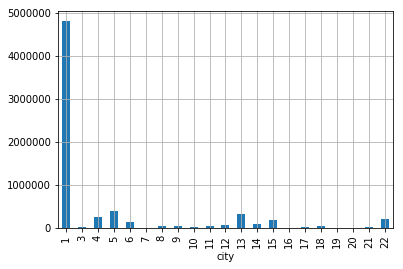

In [24]:
#C2: Most members come from city 1
city['msno'].plot(kind='bar')
plt.show()

In [47]:
#Q6: What is 'bd'
#C3: 'bd' is the age of each member
df = mbrs['bd']
df = np.unique(df)
print(df)
df.size

[-7168 -6998 -6807 -6445 -5978 -3152 -2828 -1970  -974  -958  -956  -951
  -540  -529  -527  -526  -525  -524  -523  -522  -521  -520  -519  -518
  -517  -516  -515  -514  -513  -512  -511  -510  -509  -508  -507  -506
  -505  -504  -503  -502  -501  -500  -498  -497  -496  -493  -489  -488
  -484  -482  -178  -176   -52   -51   -50   -49   -48   -47   -46   -45
   -44   -43   -42   -41   -40   -39   -38   -37   -36   -35   -34   -33
   -32   -31   -30   -23   -22   -19   -14   -12   -10    -9    -8    -7
    -5     0     1     2     3     4     5     6     7     8     9    10
    11    12    13    14    15    16    17    18    19    20    21    22
    23    24    25    26    27    28    29    30    31    32    33    34
    35    36    37    38    39    40    41    42    43    44    45    46
    47    48    49    50    51    52    53    54    55    56    57    58
    59    60    61    62    63    64    65    66    67    68    69    70
    71    72    73    74    75    76    77    78   

386

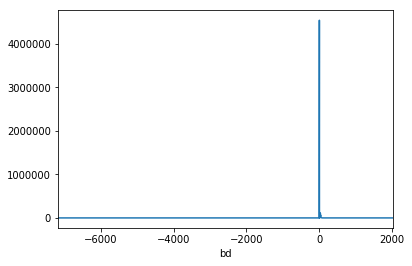

In [58]:
age = mbrs.groupby('bd').agg('count')
age['ratio'] = round((age['msno'] / 6769473) * 100, 4)
age['msno'].plot()
plt.show()

In [33]:
#C4: There are significant outliers
#C5: Members typically age from 15-55
df = age[age['ratio'] >= 0.1]
df

,msno,city,gender,registered_via,registration_init_time,ratio
bd,,,,,,
0,4540215,4540215,151602,4540215,4540215,67.0690
15,16645,16645,16461,16645,16645,0.2459
16,42778,42778,40612,42778,42778,0.6319
17,82111,82111,81162,82111,82111,1.2130
18,90659,90659,89603,90659,90659,1.3392
19,91374,91374,90172,91374,91374,1.3498
20,110452,110452,108726,110452,110452,1.6316
21,110574,110574,108857,110574,110574,1.6334
22,112200,112200,110141,112200,112200,1.6574


           msno     city       bd  registered_via  registration_init_time  \
gender                                                                      
female  1144613  1144613  1144613         1144613                 1144613   
male    1195355  1195355  1195355         1195355                 1195355   

          ratio  
gender           
female  16.9085  
male    17.6580  


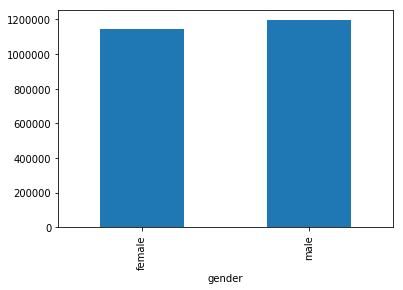

In [36]:
#Q7: What is the gender distribution of members
#C6: almost an equal amount of men and women; 67% did not report gender
gen = mbrs.groupby('gender').agg('count')
gen['ratio'] = round((gen['msno'] / 6769473) * 100, 4)
#print(gen)
gen['msno'].plot(kind='bar')
plt.show()

In [48]:
#Q8: How many registration methods were there & whats the usage distribution
df = mbrs['registered_via']
df = np.unique(df)
print(df)
df.size

[-1  1  2  3  4  5  6  7  8  9 10 11 13 14 16 17 18 19]


18

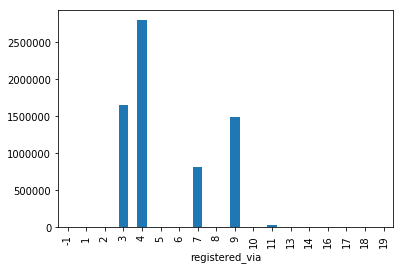

In [59]:
#C7: Most used methods 3, 4, 7 & 9
reg = mbrs.groupby('registered_via').agg('count')
reg['ratio'] = round((reg['msno'] / 6769473) * 100, 4)
reg['msno'].plot(kind='bar')
plt.show()

In [9]:
#Q9: What is the earliest and latest registration time
df = mbrs['registration_init_time']
print(df.min())
print(df.max())

20040326
20170429


In [63]:
mbrs['registration_init_time'] = pd.to_datetime(mbrs['registration_init_time'], format='%Y%m%d')

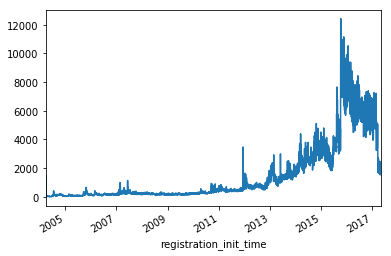

In [64]:
#T1: Upward tick in membership starting in 2010
init = mbrs.groupby('registration_init_time').agg('count')
init['ratio'] = round((init['msno'] / 6769473) * 100, 4)

init['msno'].plot()
plt.show()

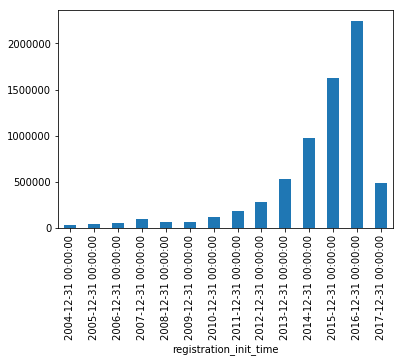

In [65]:
yr = init.resample("A").sum()
yr['msno'].plot(kind='bar')
yr['ratio'] = round((yr['msno'] / 6769473) * 100, 4)
#print(yr)
plt.show()

In [66]:
mbrs['reg_init_mth'] = mbrs['registration_init_time'].dt.month

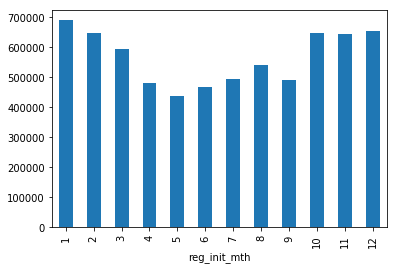

In [67]:
#C8: Majority of members register in the beginning and end of the year
mth = mbrs.groupby('reg_init_mth').agg('count')
mth['ratio'] = round((mth['msno'] / 6769473) * 100, 4)
#print(mth)
mth['msno'].plot(kind='bar')
plt.show()

In [68]:
mbrs['reg_init_day'] = mbrs['registration_init_time'].dt.day

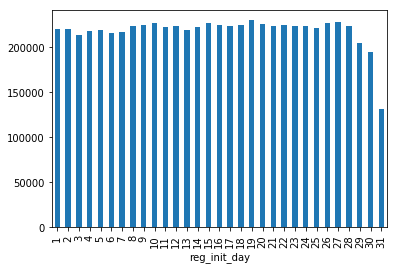

In [69]:
day = mbrs.groupby('reg_init_day').agg('count')
day['ratio'] = round((day['msno'] / 6769473) * 100, 4)
#print(day)
day['msno'].plot(kind='bar')
plt.show()

In [123]:
#Q10: What are the contents of the given transactions file
transactions_path = '/Users/Pewelix/Documents/Data_Science/KKBox_Challenge/transactions_v2.csv'
trans = pd.read_csv(transactions_path)

In [11]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1431009 entries, 0 to 1431008
Data columns (total 9 columns):
msno                      1431009 non-null object
payment_method_id         1431009 non-null int64
payment_plan_days         1431009 non-null int64
plan_list_price           1431009 non-null int64
actual_amount_paid        1431009 non-null int64
is_auto_renew             1431009 non-null int64
transaction_date          1431009 non-null int64
membership_expire_date    1431009 non-null int64
is_cancel                 1431009 non-null int64
dtypes: int64(8), object(1)
memory usage: 98.3+ MB


In [12]:
trans.describe()

,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
count,1.431009e+06,1.431009e+06,1.431009e+06,1.431009e+06,1.431009e+06,1.431009e+06,1.431009e+06,1.431009e+06
mean,3.791835e+01,6.601770e+01,2.817870e+02,2.813172e+02,7.853025e-01,2.016848e+07,2.017110e+07,2.455121e-02
std,4.964805e+00,1.024864e+02,4.351861e+02,4.354200e+02,4.106124e-01,4.858797e+03,3.032367e+03,1.547529e-01
min,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.015010e+07,2.016042e+07,0.000000e+00
25%,3.600000e+01,3.000000e+01,9.900000e+01,9.900000e+01,1.000000e+00,2.017023e+07,2.017041e+07,0.000000e+00
50%,4.000000e+01,3.000000e+01,1.490000e+02,1.490000e+02,1.000000e+00,2.017031e+07,2.017042e+07,0.000000e+00
75%,4.100000e+01,3.000000e+01,1.490000e+02,1.490000e+02,1.000000e+00,2.017032e+07,2.017050e+07,0.000000e+00
max,4.100000e+01,4.500000e+02,2.000000e+03,2.000000e+03,1.000000e+00,2.017033e+07,2.036102e+07,1.000000e+00


In [13]:
trans.columns

Index(['msno', 'payment_method_id', 'payment_plan_days', 'plan_list_price',
       'actual_amount_paid', 'is_auto_renew', 'transaction_date',
       'membership_expire_date', 'is_cancel'],
      dtype='object')

In [14]:
trans.isnull().sum()

msno                      0
payment_method_id         0
payment_plan_days         0
plan_list_price           0
actual_amount_paid        0
is_auto_renew             0
transaction_date          0
membership_expire_date    0
is_cancel                 0
dtype: int64

In [104]:
trans.duplicated().sum()

0

In [24]:
trans['msno'].describe()

count                                          1431009
unique                                         1197050
top       72gJqt1O31E/WoxAEYFn9LHNI6mAZFGera5Q6gvsFkA=
freq                                               208
Name: msno, dtype: object

In [105]:
#Q11: How many transactions were there per user
trans['trans_count'] = trans.groupby('msno')['msno'].transform('count')
trans.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,trans_mth,trans_day,exp_mth,exp_day,trans_count
0,++6eU4LsQ3UQ20ILS7d99XK8WbiVgbyYL4FUgzZR134=,32,90,298,298,0,2017-01-31,2017-05-04,0,1,31,5,4,1
1,++lvGPJOinuin/8esghpnqdljm6NXS8m8Zwchc7gOeA=,41,30,149,149,1,2015-08-09,2019-04-12,0,8,9,4,12,39
2,+/GXNtXWQVfKrEDqYAzcSw2xSPYMKWNj22m+5XkVQZc=,36,30,180,180,1,2017-03-03,2017-04-22,0,3,3,4,22,1
3,+/w1UrZwyka4C9oNH3+Q8fUf3fD8R3EwWrx57ODIsqk=,36,30,180,180,1,2017-03-29,2017-03-31,1,3,29,3,31,1
4,+00PGzKTYqtnb65mPKPyeHXcZEwqiEzktpQksaaSC3c=,41,30,99,99,1,2017-03-23,2017-04-23,0,3,23,4,23,1


In [12]:
df = trans['payment_method_id']
df = np.unique(df)
print(df)
df.size

[ 2  3  5  6  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29
 30 31 32 33 34 35 36 37 38 39 40 41]


37

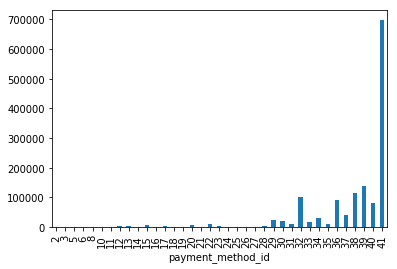

In [106]:
df = trans.groupby('payment_method_id').agg('count')
df['ratio'] = round((df['msno'] / 1431009) * 100, 4)
df['msno'].plot(kind='bar')
plt.show()

In [107]:
#Q12: Did members use multiple payment methods
df1 = trans.drop_duplicates(['msno', 'payment_method_id'])

In [108]:
df1.duplicated('msno').sum()
#some mbrs used mutiple payment methods

18888

In [109]:
#Q13: How many payment methods did each member use
df1['methods_used'] = df1.groupby('msno')['msno'].transform('count')
df1.head()

/Users/Pewelix/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,trans_mth,trans_day,exp_mth,exp_day,trans_count,methods_used
0,++6eU4LsQ3UQ20ILS7d99XK8WbiVgbyYL4FUgzZR134=,32,90,298,298,0,2017-01-31,2017-05-04,0,1,31,5,4,1,1
1,++lvGPJOinuin/8esghpnqdljm6NXS8m8Zwchc7gOeA=,41,30,149,149,1,2015-08-09,2019-04-12,0,8,9,4,12,39,1
2,+/GXNtXWQVfKrEDqYAzcSw2xSPYMKWNj22m+5XkVQZc=,36,30,180,180,1,2017-03-03,2017-04-22,0,3,3,4,22,1,1
3,+/w1UrZwyka4C9oNH3+Q8fUf3fD8R3EwWrx57ODIsqk=,36,30,180,180,1,2017-03-29,2017-03-31,1,3,29,3,31,1,1
4,+00PGzKTYqtnb65mPKPyeHXcZEwqiEzktpQksaaSC3c=,41,30,99,99,1,2017-03-23,2017-04-23,0,3,23,4,23,1,1


In [111]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1215938 entries, 0 to 1431008
Data columns (total 15 columns):
msno                      1215938 non-null object
payment_method_id         1215938 non-null int64
payment_plan_days         1215938 non-null int64
plan_list_price           1215938 non-null int64
actual_amount_paid        1215938 non-null int64
is_auto_renew             1215938 non-null int64
transaction_date          1215938 non-null datetime64[ns]
membership_expire_date    1215938 non-null datetime64[ns]
is_cancel                 1215938 non-null int64
trans_mth                 1215938 non-null int64
trans_day                 1215938 non-null int64
exp_mth                   1215938 non-null int64
exp_day                   1215938 non-null int64
trans_count               1215938 non-null int64
methods_used              1215938 non-null int64
dtypes: datetime64[ns](2), int64(12), object(1)
memory usage: 148.4+ MB


In [112]:
df1 = df1[['msno', 'methods_used']]

,msno,methods_used
0,++6eU4LsQ3UQ20ILS7d99XK8WbiVgbyYL4FUgzZR134=,1
1,++lvGPJOinuin/8esghpnqdljm6NXS8m8Zwchc7gOeA=,1
2,+/GXNtXWQVfKrEDqYAzcSw2xSPYMKWNj22m+5XkVQZc=,1
3,+/w1UrZwyka4C9oNH3+Q8fUf3fD8R3EwWrx57ODIsqk=,1
4,+00PGzKTYqtnb65mPKPyeHXcZEwqiEzktpQksaaSC3c=,1


In [113]:
#Save methods data for master file
df1.to_csv('/Users/Pewelix/Documents/Data_Science/KKBox_Challenge/methods.csv', index=False)

In [133]:
methods_path = '/Users/Pewelix/Documents/Data_Science/KKBox_Challenge/methods.csv'
methods = pd.read_csv(methods_path)
methods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215938 entries, 0 to 1215937
Data columns (total 2 columns):
msno            1215938 non-null object
methods_used    1215938 non-null int64
dtypes: int64(1), object(1)
memory usage: 18.6+ MB


In [17]:
df1['methods_used'].unique()

array([1, 2, 3, 4, 8, 5])

In [18]:
df = trans['payment_plan_days']
df = np.unique(df)
print(df)
df.size

[  0   1   3   7  10  14  21  30  31  35  45  60  70  80  90 100 110 120
 180 195 200 230 240 270 360 365 395 400 410 415 450]


31

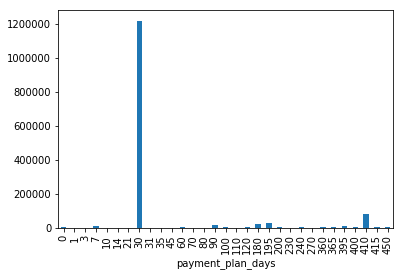

In [114]:
df = trans.groupby('payment_plan_days').agg('count')
df['ratio'] = round((df['msno'] / 1431009) * 100, 4)
df['msno'].plot(kind='bar')
plt.show()

In [115]:
#Q14 Did members use multiple payment plan options
df1 = trans.drop_duplicates(['msno', 'payment_plan_days'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1218882 entries, 0 to 1431008
Data columns (total 14 columns):
msno                      1218882 non-null object
payment_method_id         1218882 non-null int64
payment_plan_days         1218882 non-null int64
plan_list_price           1218882 non-null int64
actual_amount_paid        1218882 non-null int64
is_auto_renew             1218882 non-null int64
transaction_date          1218882 non-null datetime64[ns]
membership_expire_date    1218882 non-null datetime64[ns]
is_cancel                 1218882 non-null int64
trans_mth                 1218882 non-null int64
trans_day                 1218882 non-null int64
exp_mth                   1218882 non-null int64
exp_day                   1218882 non-null int64
trans_count               1218882 non-null int64
dtypes: datetime64[ns](2), int64(11), object(1)
memory usage: 139.5+ MB


In [116]:
df1.duplicated('msno').sum()

21832

In [117]:
#Q15: How many payment plan options did each member use
df1['plans_used'] = df1.groupby('msno')['msno'].transform('count')
df1.head()

/Users/Pewelix/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,trans_mth,trans_day,exp_mth,exp_day,trans_count,plans_used
0,++6eU4LsQ3UQ20ILS7d99XK8WbiVgbyYL4FUgzZR134=,32,90,298,298,0,2017-01-31,2017-05-04,0,1,31,5,4,1,1
1,++lvGPJOinuin/8esghpnqdljm6NXS8m8Zwchc7gOeA=,41,30,149,149,1,2015-08-09,2019-04-12,0,8,9,4,12,39,2
2,+/GXNtXWQVfKrEDqYAzcSw2xSPYMKWNj22m+5XkVQZc=,36,30,180,180,1,2017-03-03,2017-04-22,0,3,3,4,22,1,1
3,+/w1UrZwyka4C9oNH3+Q8fUf3fD8R3EwWrx57ODIsqk=,36,30,180,180,1,2017-03-29,2017-03-31,1,3,29,3,31,1,1
4,+00PGzKTYqtnb65mPKPyeHXcZEwqiEzktpQksaaSC3c=,41,30,99,99,1,2017-03-23,2017-04-23,0,3,23,4,23,1,1


In [118]:
df1['plans_used'].unique()

array([1, 2, 3, 4, 5])

In [119]:
df1 = df1[['msno', 'plans_used']]
df1.to_csv('/Users/Pewelix/Documents/Data_Science/KKBox_Challenge/plans.csv', index=False)

In [17]:
df = trans['plan_list_price']
df = np.unique(df)
print(df)
df.size

[   0    1   15   30   35   50   70   99  100  105  119  120  126  129  131
  134  143  149  150  180  210  265  298  300  350  400  447  450  477  480
  500  536  596  600  699  799  894  930 1000 1150 1200 1260 1299 1300 1399
 1599 1788 2000]


48

In [18]:
df = trans['actual_amount_paid']
df = np.unique(df)
print(df)
df.size

[   0    1   15   30   35   50   70   99  100  105  119  120  127  129  131
  134  143  149  150  180  210  265  298  300  350  400  447  450  477  480
  500  536  596  600  699  799  849  894  897  930  984 1000 1150 1200 1260
 1299 1300 1399 1599 1778 1780 1788 2000]


53

In [120]:
#Q16: Is there a difference in plan price and amount paid?
trans['discount'] = trans['plan_list_price'] - trans['actual_amount_paid']

In [4]:
df = trans[trans['discount'] > 0]
df.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,discount
93,+mXgXN9NisBdSTP04s9rygfqrxis9eC2rHOGYVgpS2A=,29,30,180,0,1,20170320,20170322,0,180
223,/zUy0ZpuvG7I86XolIjVaL/4dRsYHCC/HB6icrMxvS0=,41,30,149,119,1,20150808,20180508,0,30
411,1gX54MfX0NMX47+cAbzPjwlBBXspYCi82Zvkrh+i+Ec=,29,30,180,0,1,20170315,20170317,0,180
552,2y/qhXUfMcoD/UjTUjNX9fjgyQ38xHrnJyj/RUvGRO0=,29,30,180,0,1,20170326,20170328,0,180
639,3k6KJL1Tl6eJqJ1Um/R7sLKqHUiVPYRLjDmnW67vqvA=,29,30,180,0,1,20170306,20170308,0,180


In [5]:
df['discount'] = round((df['discount'] / df['plan_list_price']) * 100, 1)
df.head()

/Users/Pewelix/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,discount
93,+mXgXN9NisBdSTP04s9rygfqrxis9eC2rHOGYVgpS2A=,29,30,180,0,1,20170320,20170322,0,100.0
223,/zUy0ZpuvG7I86XolIjVaL/4dRsYHCC/HB6icrMxvS0=,41,30,149,119,1,20150808,20180508,0,20.1
411,1gX54MfX0NMX47+cAbzPjwlBBXspYCi82Zvkrh+i+Ec=,29,30,180,0,1,20170315,20170317,0,100.0
552,2y/qhXUfMcoD/UjTUjNX9fjgyQ38xHrnJyj/RUvGRO0=,29,30,180,0,1,20170326,20170328,0,100.0
639,3k6KJL1Tl6eJqJ1Um/R7sLKqHUiVPYRLjDmnW67vqvA=,29,30,180,0,1,20170306,20170308,0,100.0


In [6]:
df['discount'].unique()

array([ 100. ,   20.1,   33.6,   13.4,    5. ,    0.7,    0.6,    0.4])

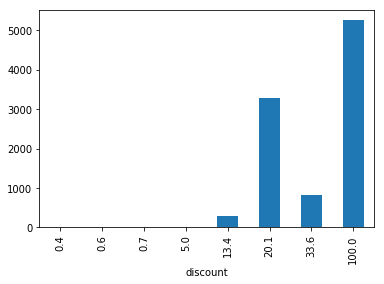

In [7]:
df = df.groupby('discount').agg('count')
df['ratio'] = round((df['msno'] / 9639) * 100, 4)
df['msno'].plot(kind='bar')
plt.show()

In [8]:
df = trans['is_auto_renew']
df = np.unique(df)
print(df)
df.size

[0 1]


2

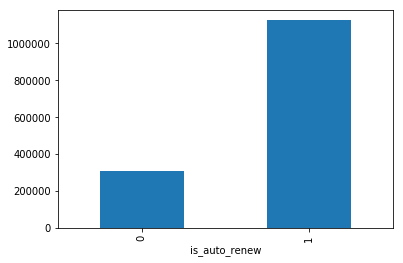

In [10]:
df = trans.groupby('is_auto_renew').agg('count')
df['ratio'] = round((df['msno'] / 1431009) * 100, 4)
df['msno'].plot(kind='bar')
plt.show()

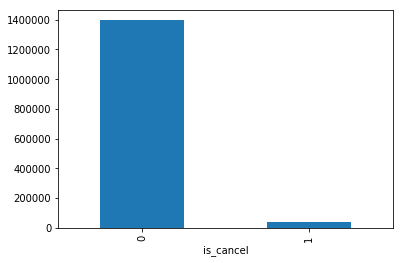

In [11]:
df = trans.groupby('is_cancel').agg('count')
df['ratio'] = round((df['msno'] / 1431009) * 100, 4)
df['msno'].plot(kind='bar')
plt.show()

In [20]:
df = trans['transaction_date']
print(df.min())
print(df.max())

20150101
20170331


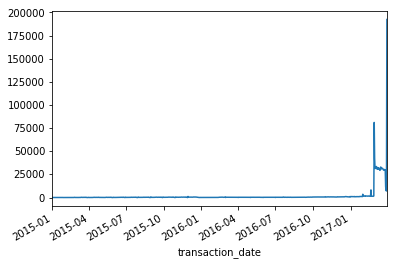

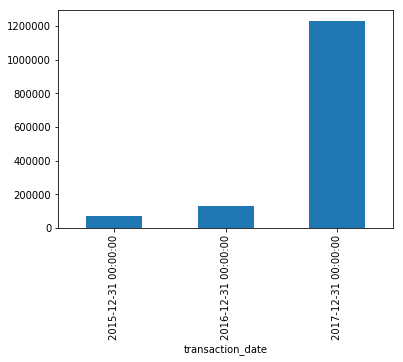

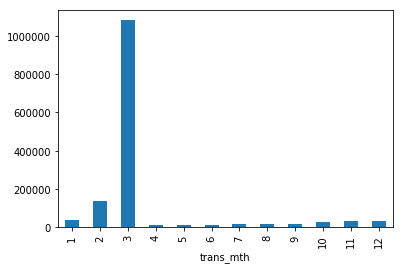

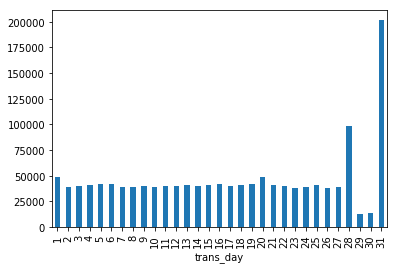

In [6]:
trans['transaction_date'] = pd.to_datetime(trans['transaction_date'], format='%Y%m%d')

init = trans.groupby('transaction_date').agg('count')
init['ratio'] = round((init['msno'] / 1431009) * 100, 4)

init['msno'].plot()
plt.show()

yr = init.resample("A").sum()
yr['msno'].plot(kind='bar')
yr['ratio'] = round((yr['msno'] / 1431009) * 100, 4)
#print(yr)
plt.show()

trans['trans_mth'] = trans['transaction_date'].dt.month

mth = trans.groupby('trans_mth').agg('count')
mth['ratio'] = round((mth['msno'] / 1431009) * 100, 4)
#print(mth)
mth['msno'].plot(kind='bar')
plt.show()

trans['trans_day'] = trans['transaction_date'].dt.day

day = trans.groupby('trans_day').agg('count')
day['ratio'] = round((day['msno'] / 1431009) * 100, 4)
#print(day)
day['msno'].plot(kind='bar')
plt.show()

In [21]:
#Q17: What was the earliest and latest recorded expiration date
df = trans['membership_expire_date']
print(df.min())
print(df.max())

20160419
20361015


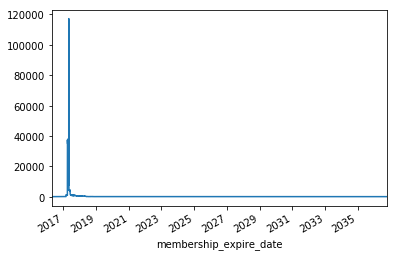

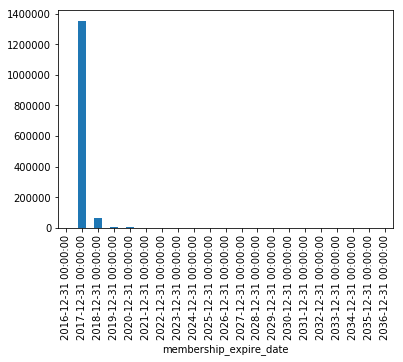

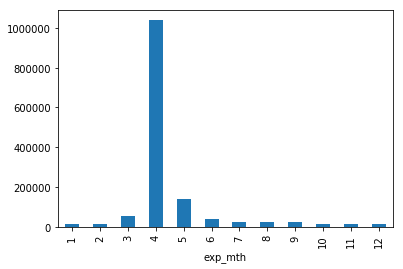

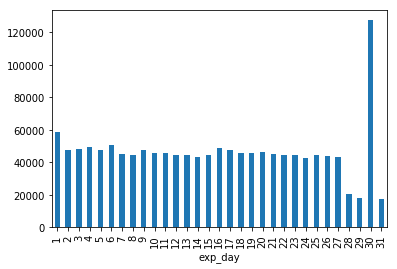

In [7]:
trans['membership_expire_date'] = pd.to_datetime(trans['membership_expire_date'], format='%Y%m%d')

init = trans.groupby('membership_expire_date').agg('count')
init['ratio'] = round((init['msno'] / 1431009) * 100, 4)

init['msno'].plot()
plt.show()

yr = init.resample("A").sum()
yr['msno'].plot(kind='bar')
yr['ratio'] = round((yr['msno'] / 1431009) * 100, 4)
#print(yr)
plt.show()

trans['exp_mth'] = trans['membership_expire_date'].dt.month

mth = trans.groupby('exp_mth').agg('count')
mth['ratio'] = round((mth['msno'] / 1431009) * 100, 4)
#print(mth)
mth['msno'].plot(kind='bar')
plt.show()

trans['exp_day'] = trans['membership_expire_date'].dt.day

day = trans.groupby('exp_day').agg('count')
day['ratio'] = round((day['msno'] / 1431009) * 100, 4)
#print(day)
day['msno'].plot(kind='bar')
plt.show()

In [11]:
trans.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,trans_mth,trans_day,exp_mth,exp_day
0,++6eU4LsQ3UQ20ILS7d99XK8WbiVgbyYL4FUgzZR134=,32,90,298,298,0,2017-01-31,2017-05-04,0,1,31,5,4
1,++lvGPJOinuin/8esghpnqdljm6NXS8m8Zwchc7gOeA=,41,30,149,149,1,2015-08-09,2019-04-12,0,8,9,4,12
2,+/GXNtXWQVfKrEDqYAzcSw2xSPYMKWNj22m+5XkVQZc=,36,30,180,180,1,2017-03-03,2017-04-22,0,3,3,4,22
3,+/w1UrZwyka4C9oNH3+Q8fUf3fD8R3EwWrx57ODIsqk=,36,30,180,180,1,2017-03-29,2017-03-31,1,3,29,3,31
4,+00PGzKTYqtnb65mPKPyeHXcZEwqiEzktpQksaaSC3c=,41,30,99,99,1,2017-03-23,2017-04-23,0,3,23,4,23


In [43]:
df = trans[trans['transaction_date'] > '2016-12-31 00:00:00']
df = df[df['membership_expire_date'] < '2017-08-31 00:00:00']
df.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,trans_mth,trans_day,exp_mth,exp_day
0,++6eU4LsQ3UQ20ILS7d99XK8WbiVgbyYL4FUgzZR134=,32,90,298,298,0,2017-01-31,2017-05-04,0,1,31,5,4
2,+/GXNtXWQVfKrEDqYAzcSw2xSPYMKWNj22m+5XkVQZc=,36,30,180,180,1,2017-03-03,2017-04-22,0,3,3,4,22
3,+/w1UrZwyka4C9oNH3+Q8fUf3fD8R3EwWrx57ODIsqk=,36,30,180,180,1,2017-03-29,2017-03-31,1,3,29,3,31
4,+00PGzKTYqtnb65mPKPyeHXcZEwqiEzktpQksaaSC3c=,41,30,99,99,1,2017-03-23,2017-04-23,0,3,23,4,23
6,+0MeUJe1cGb4O97gJoTPUPjiONQzi9BmxDuKRZn+E2o=,41,30,99,99,1,2017-03-13,2017-04-13,0,3,13,4,13


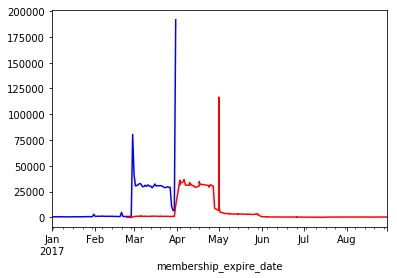

In [44]:
x = df.groupby('transaction_date').agg('count')
x['msno'].plot(color='b')

y = df.groupby('membership_expire_date').agg('count')
y['msno'].plot(color='r')

plt.show()

In [122]:
trans.to_csv("transactions_v2.csv", index=False) 
transactions_path = '/Users/Pewelix/Documents/Data_Science/KKBox_Challenge/transactions_v2.csv'
trans = pd.read_csv(transactions_path)

In [125]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1431009 entries, 0 to 1431008
Data columns (total 15 columns):
msno                      1431009 non-null object
payment_method_id         1431009 non-null int64
payment_plan_days         1431009 non-null int64
plan_list_price           1431009 non-null int64
actual_amount_paid        1431009 non-null int64
is_auto_renew             1431009 non-null int64
transaction_date          1431009 non-null object
membership_expire_date    1431009 non-null object
is_cancel                 1431009 non-null int64
trans_mth                 1431009 non-null int64
trans_day                 1431009 non-null int64
exp_mth                   1431009 non-null int64
exp_day                   1431009 non-null int64
trans_count               1431009 non-null int64
discount                  1431009 non-null int64
dtypes: int64(12), object(3)
memory usage: 163.8+ MB


In [131]:
trans.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,trans_mth,trans_day,exp_mth,exp_day,trans_count,discount
0,++6eU4LsQ3UQ20ILS7d99XK8WbiVgbyYL4FUgzZR134=,32,90,298,298,0,2017-01-31,2017-05-04,0,1,31,5,4,1,0
1,++lvGPJOinuin/8esghpnqdljm6NXS8m8Zwchc7gOeA=,41,30,149,149,1,2015-08-09,2019-04-12,0,8,9,4,12,39,0
2,+/GXNtXWQVfKrEDqYAzcSw2xSPYMKWNj22m+5XkVQZc=,36,30,180,180,1,2017-03-03,2017-04-22,0,3,3,4,22,1,0
3,+/w1UrZwyka4C9oNH3+Q8fUf3fD8R3EwWrx57ODIsqk=,36,30,180,180,1,2017-03-29,2017-03-31,1,3,29,3,31,1,0
4,+00PGzKTYqtnb65mPKPyeHXcZEwqiEzktpQksaaSC3c=,41,30,99,99,1,2017-03-23,2017-04-23,0,3,23,4,23,1,0


In [129]:
a = pd.read_csv(transactions_path)
b = pd.read_csv(methods_path)
b = b.dropna(axis=1,how='all')
merged = a.merge(b, on='msno')
merged.to_csv("trans_msr.csv", index=False)

In [130]:
trans_msr_path = '/Users/Pewelix/Documents/Data_Science/KKBox_Challenge/trans_msr.csv'
x = pd.read_csv(trans_msr_path)
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1479464 entries, 0 to 1479463
Data columns (total 16 columns):
msno                      1479464 non-null object
payment_method_id         1479464 non-null int64
payment_plan_days         1479464 non-null int64
plan_list_price           1479464 non-null int64
actual_amount_paid        1479464 non-null int64
is_auto_renew             1479464 non-null int64
transaction_date          1479464 non-null object
membership_expire_date    1479464 non-null object
is_cancel                 1479464 non-null int64
trans_mth                 1479464 non-null int64
trans_day                 1479464 non-null int64
exp_mth                   1479464 non-null int64
exp_day                   1479464 non-null int64
trans_count               1479464 non-null int64
discount                  1479464 non-null int64
methods_used              1479464 non-null int64
dtypes: int64(13), object(3)
memory usage: 180.6+ MB


In [134]:
plans_path = '/Users/Pewelix/Documents/Data_Science/KKBox_Challenge/plans.csv'

a = pd.read_csv(trans_msr_path)
b = pd.read_csv(plans_path)
b = b.dropna(axis=1,how='all')
merged = a.merge(b, on='msno')
merged.to_csv("trans_msr.csv", index=False)

In [135]:
trans_msr_path = '/Users/Pewelix/Documents/Data_Science/KKBox_Challenge/trans_msr.csv'
x = pd.read_csv(trans_msr_path)
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1612890 entries, 0 to 1612889
Data columns (total 17 columns):
msno                      1612890 non-null object
payment_method_id         1612890 non-null int64
payment_plan_days         1612890 non-null int64
plan_list_price           1612890 non-null int64
actual_amount_paid        1612890 non-null int64
is_auto_renew             1612890 non-null int64
transaction_date          1612890 non-null object
membership_expire_date    1612890 non-null object
is_cancel                 1612890 non-null int64
trans_mth                 1612890 non-null int64
trans_day                 1612890 non-null int64
exp_mth                   1612890 non-null int64
exp_day                   1612890 non-null int64
trans_count               1612890 non-null int64
discount                  1612890 non-null int64
methods_used              1612890 non-null int64
plans_used                1612890 non-null int64
dtypes: int64(14), object(3)
memory usage: 209.2+ M

In [141]:
x.duplicated().sum()
x = x.drop_duplicates()
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1431009 entries, 0 to 1612889
Data columns (total 17 columns):
msno                      1431009 non-null object
payment_method_id         1431009 non-null int64
payment_plan_days         1431009 non-null int64
plan_list_price           1431009 non-null int64
actual_amount_paid        1431009 non-null int64
is_auto_renew             1431009 non-null int64
transaction_date          1431009 non-null object
membership_expire_date    1431009 non-null object
is_cancel                 1431009 non-null int64
trans_mth                 1431009 non-null int64
trans_day                 1431009 non-null int64
exp_mth                   1431009 non-null int64
exp_day                   1431009 non-null int64
trans_count               1431009 non-null int64
discount                  1431009 non-null int64
methods_used              1431009 non-null int64
plans_used                1431009 non-null int64
dtypes: int64(14), object(3)
memory usage: 196.5+ M

In [142]:
x.to_csv("transactions_v2.csv", index=False) 
transactions_path = '/Users/Pewelix/Documents/Data_Science/KKBox_Challenge/transactions_v2.csv'
trans = pd.read_csv(transactions_path)

In [3]:
#Q18: What are the contents of the given user_logs_file
user_logs_path = '/Users/Pewelix/Documents/Data_Science/KKBox_Challenge/user_logs_v2.csv'
logs = pd.read_csv(user_logs_path)

In [26]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18396362 entries, 0 to 18396361
Data columns (total 9 columns):
msno          object
date          int64
num_25        int64
num_50        int64
num_75        int64
num_985       int64
num_100       int64
num_unq       int64
total_secs    float64
dtypes: float64(1), int64(7), object(1)
memory usage: 1.2+ GB


In [27]:
logs.describe()

,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
count,1.839636e+07,1.839636e+07,1.839636e+07,1.839636e+07,1.839636e+07,1.839636e+07,1.839636e+07,1.839636e+07
mean,2.017032e+07,6.191401e+00,1.508789e+00,9.413759e-01,1.079905e+00,3.028246e+01,2.903615e+01,7.904814e+03
std,8.916720e+00,1.342827e+01,3.908539e+00,1.924840e+00,3.518409e+00,4.203641e+01,3.219866e+01,1.013632e+04
min,2.017030e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e-03
25%,2.017031e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00,8.000000e+00,1.959944e+03
50%,2.017032e+07,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.700000e+01,1.800000e+01,4.582990e+03
75%,2.017032e+07,7.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,3.700000e+01,3.800000e+01,9.848441e+03
max,2.017033e+07,5.639000e+03,9.120000e+02,5.080000e+02,1.561000e+03,4.110700e+04,4.925000e+03,9.194059e+06


In [28]:
logs.columns

Index(['msno', 'date', 'num_25', 'num_50', 'num_75', 'num_985', 'num_100',
       'num_unq', 'total_secs'],
      dtype='object')

In [29]:
logs.isnull().sum()

msno          0
date          0
num_25        0
num_50        0
num_75        0
num_985       0
num_100       0
num_unq       0
total_secs    0
dtype: int64

In [30]:
logs.duplicated().sum()

0

In [31]:
logs['msno'].describe()

count                                         18396362
unique                                         1103894
top       tyajEvslpKHJhVrx97u7JJ9mMDknD4ySfEFwTg1KmQ0=
freq                                                31
Name: msno, dtype: object

In [32]:
#Q19: What is the earliest and latest log
#C9: The logs span only the month of March 2017
df = logs['date']
print(df.min())
print(df.max())

20170301
20170331


In [145]:
#Q20: How many logs are there per each member
logs['days_used'] = logs.groupby('msno')['msno'].transform('count')

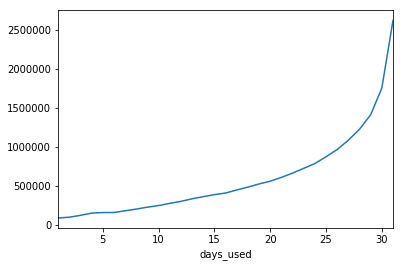

In [57]:
init = logs.groupby('days_used').agg('count')

init['msno'].plot()
plt.show()

In [146]:
#Q21: How many songs did each member listen to on a given day per their log
logs['total_day'] = logs['num_25'] + logs['num_50'] + logs['num_75'] + logs['num_985'] + logs['num_100']

In [147]:
#Q22: How many songs were listened to more than once
logs['fav_songs'] = logs['total_day'] - logs['num_unq']

In [45]:
logs.head()

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,total_day,fav_songs
0,u9E91QDTvHLq6NXjEaWv8u4QIqhrHk72kE+w31Gnhdg=,2017-03-31,8,4,0,1,21,18,6309.273,34,16
1,nTeWW/eOZA/UHKdD5L7DEqKKFTjaAj3ALLPoAWsU8n0=,2017-03-30,2,2,1,0,9,11,2390.699,14,3
2,2UqkWXwZbIjs03dHLU9KHJNNEvEkZVzm69f3jCS+uLI=,2017-03-31,52,3,5,3,84,110,23203.337,147,37
3,ycwLc+m2O0a85jSLALtr941AaZt9ai8Qwlg9n0Nql5U=,2017-03-31,176,4,2,2,19,191,7100.454,203,12
4,EGcbTofOSOkMmQyN1NMLxHEXJ1yV3t/JdhGwQ9wXjnI=,2017-03-31,2,1,0,1,112,93,28401.558,116,23


In [148]:
#Q23: How many songs were listened to 25/50/75/985/100% of the length of the song throughout their entire membership
logs['sum_25'] = logs.groupby('msno')['num_25'].transform('sum')
logs['sum_50'] = logs.groupby('msno')['num_50'].transform('sum')
logs['sum_75'] = logs.groupby('msno')['num_75'].transform('sum')
logs['sum_985'] = logs.groupby('msno')['num_985'].transform('sum')
logs['sum_100'] = logs.groupby('msno')['num_100'].transform('sum')

In [149]:
#Q24: How many songs has a member listened to up to now in their membership
logs['sum_songs'] = logs.sum_25 + logs.sum_50 + logs.sum_75 + logs.sum_985 + logs.sum_100 

In [150]:
#Q25: What % of songs were listened to for 25/50/75/985/100% the length of the song throughout a users entire membership
logs['p25'] = round((logs.sum_25 / logs.sum_songs) * 100, 0)
logs['p50'] = round((logs.sum_50 / logs.sum_songs) * 100, 0)
logs['p75'] = round((logs.sum_75 / logs.sum_songs) * 100, 0)
logs['p985'] = round((logs.sum_985 / logs.sum_songs) * 100, 0)
logs['p100'] = round((logs.sum_100 / logs.sum_songs) * 100, 0)

In [52]:
logs.head()

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,total_day,...,sum_50,sum_75,sum_985,sum_100,p25,p50,p75,p985,p100,sum_songs
0,u9E91QDTvHLq6NXjEaWv8u4QIqhrHk72kE+w31Gnhdg=,2017-03-31,8,4,0,1,21,18,6309.273,34,...,100,87,119,1151,22.0,5.0,5.0,6.0,62.0,1864
1,nTeWW/eOZA/UHKdD5L7DEqKKFTjaAj3ALLPoAWsU8n0=,2017-03-30,2,2,1,0,9,11,2390.699,14,...,58,10,7,261,20.0,14.0,2.0,2.0,62.0,418
2,2UqkWXwZbIjs03dHLU9KHJNNEvEkZVzm69f3jCS+uLI=,2017-03-31,52,3,5,3,84,110,23203.337,147,...,55,35,39,959,32.0,3.0,2.0,2.0,60.0,1596
3,ycwLc+m2O0a85jSLALtr941AaZt9ai8Qwlg9n0Nql5U=,2017-03-31,176,4,2,2,19,191,7100.454,203,...,31,13,18,123,79.0,3.0,1.0,2.0,14.0,897
4,EGcbTofOSOkMmQyN1NMLxHEXJ1yV3t/JdhGwQ9wXjnI=,2017-03-31,2,1,0,1,112,93,28401.558,116,...,26,19,16,1633,5.0,1.0,1.0,1.0,91.0,1790


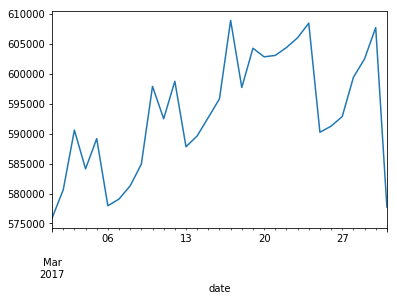

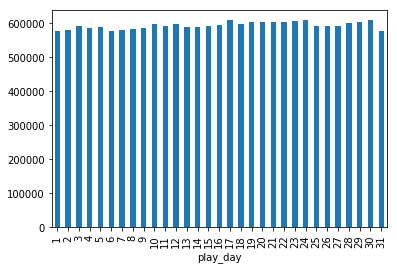

In [8]:
init = logs.groupby('date').agg('count')

init['msno'].plot()
#print(init['msno'])
plt.show()

logs['play_day'] = logs['date'].dt.day

day = logs.groupby('play_day').agg('count')
day['ratio'] = round((day['msno'] / 18396362) * 100, 4)
#print(day['msno'])
day['msno'].plot(kind='bar')
plt.show()

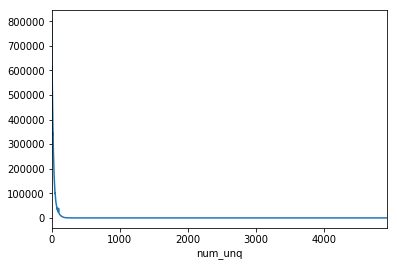

In [236]:
init = logs.groupby('num_unq').agg('count')

init['msno'].plot()
#print(init['msno'])
plt.show()

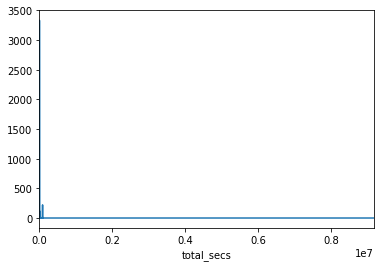

In [230]:
init = logs.groupby('total_secs').agg('count')

init['msno'].plot()
#print(init['msno'])
plt.show()

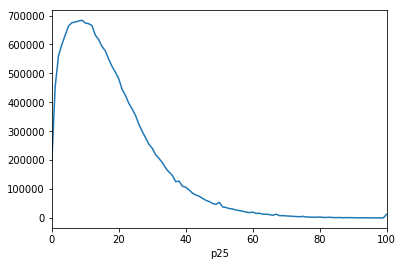

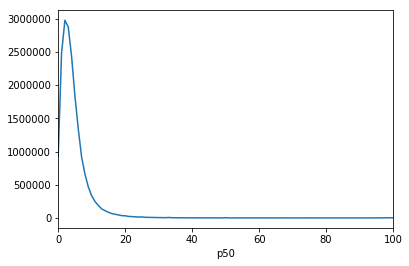

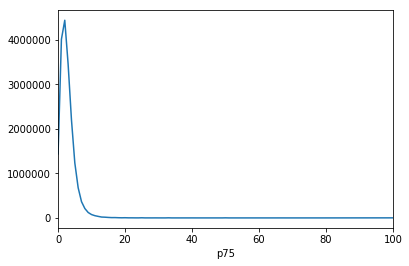

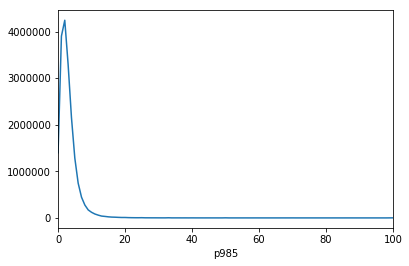

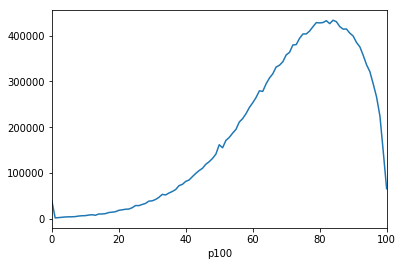

In [231]:
init = logs.groupby('p25').agg('count')

init['msno'].plot()
#print(init['msno'])
plt.show()

init = logs.groupby('p50').agg('count')

init['msno'].plot()
#print(init['msno'])
plt.show()

init = logs.groupby('p75').agg('count')

init['msno'].plot()
#print(init['msno'])
plt.show()

init = logs.groupby('p985').agg('count')

init['msno'].plot()
#print(init['msno'])
plt.show()

init = logs.groupby('p100').agg('count')

init['msno'].plot()
#print(init['msno'])
plt.show()

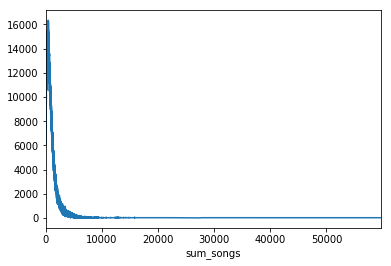

In [232]:
init = logs.groupby('sum_songs').agg('count')

init['msno'].plot()
#print(init['msno'])
plt.show()

In [152]:
logs.to_csv('/Users/Pewelix/Documents/Data_Science/KKBox_Challenge/user_logs_v2.csv', index=False)
user_logs_path = '/Users/Pewelix/Documents/Data_Science/KKBox_Challenge/user_logs_v2.csv'
logs = pd.read_csv(user_logs_path)

In [9]:
a = pd.read_csv(train_path)
b = pd.read_csv(members_path)
b = b.dropna(axis=1,how='all')
merged = a.merge(b, on='msno')
merged.to_csv("output.csv", index=False)

In [10]:
output_path = '/Users/Pewelix/Documents/Data_Science/KKBox_Challenge/output.csv'
out = pd.read_csv(output_path)
out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860967 entries, 0 to 860966
Data columns (total 7 columns):
msno                      860967 non-null object
is_churn                  860967 non-null int64
city                      860967 non-null int64
bd                        860967 non-null int64
gender                    388905 non-null object
registered_via            860967 non-null int64
registration_init_time    860967 non-null int64
dtypes: int64(5), object(2)
memory usage: 46.0+ MB


In [23]:
out['msno'].duplicated().sum()

0

In [11]:
out.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5,28,male,3,20131223
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,13,20,male,3,20131223
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,13,18,male,3,20131227
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,1,0,NaN,7,20140109
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1,13,35,female,7,20140125


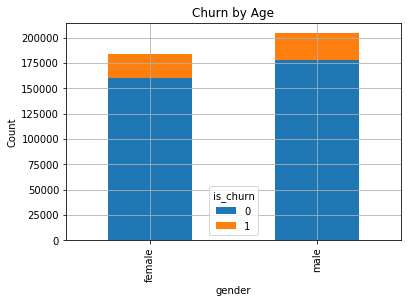

is_churn       0      1     Ratio
gender                           
female    160404  23940  0.129866
male      178165  26396  0.129037


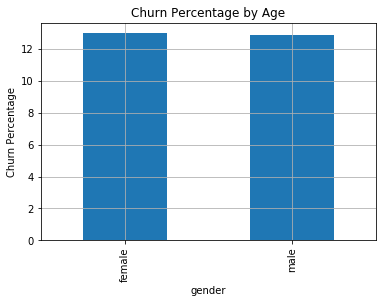

In [14]:
df=pd.crosstab(out['gender'],out['is_churn'])
df.plot(kind='bar', stacked=True, grid=True)
df["Ratio"] =  df[1] / (df[0] + df[1])

plt.ylabel('Count')
plt.title('Churn by Gender')
plt.show()

df=df.sort_values('Ratio', ascending=False)
print(df)

df['Ratio'] = df['Ratio'] * 100
df['Ratio'].plot(kind='bar', stacked=True, grid=True)
plt.ylabel('Churn Percentage')
plt.title('Churn Percentage by Gender')
plt.show()

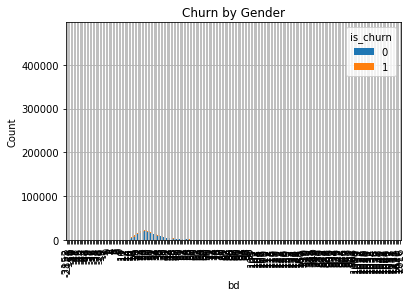

is_churn      0     1     Ratio
bd                             
 1051         0     1  1.000000
 1213         0     1  1.000000
 137          0     1  1.000000
 823          0     1  1.000000
 321          0     1  1.000000
 120          0     1  1.000000
 110          1     2  0.666667
 950          1     1  0.500000
 116          2     2  0.500000
 99           1     1  0.500000
 14         166   116  0.411348
 13          41    22  0.349206
 102         15     8  0.347826
-47           2     1  0.333333
 1037         2     1  0.333333
 15         581   267  0.314858
 4            7     3  0.300000
 16        1809   735  0.288915
 111          5     2  0.285714
 101         10     4  0.285714
 107         10     4  0.285714
 17        4330  1583  0.267715
 103         11     4  0.266667
 18        6076  2131  0.259656
 1030         3     1  0.250000
 105         16     5  0.238095
 19        7535  2326  0.235879
 79          10     3  0.230769
 98           7     2  0.222222
 20     

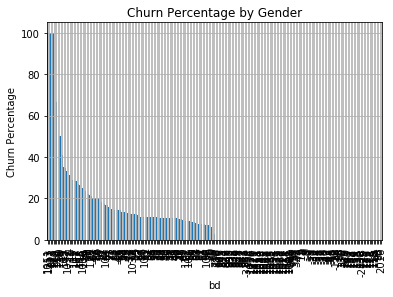

In [13]:
df=pd.crosstab(out['bd'],out['is_churn'])
df.plot(kind='bar', stacked=True, grid=True)
df["Ratio"] =  df[1] / (df[0] + df[1])

plt.ylabel('Count')
plt.title('Churn by Age')
plt.show()

df=df.sort_values('Ratio', ascending=False)
print(df)

df['Ratio'] = df['Ratio'] * 100
df['Ratio'].plot(kind='bar', stacked=True, grid=True)
plt.ylabel('Churn Percentage')
plt.title('Churn Percentage by Age')
plt.show()

In [15]:
del out['bd']
del out['gender']

In [ ]:
#Q26: What is the churn percentage for each variable and unqie value

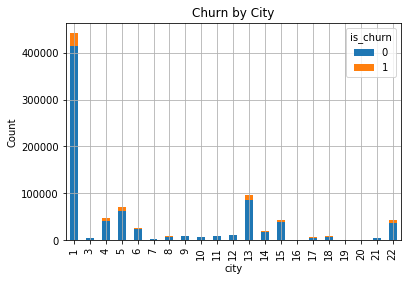

is_churn       0      1     Ratio
city                             
21          4434    765  0.147144
12          9798   1585  0.139243
8           6568   1021  0.134537
3           4385    672  0.132885
10          5612    858  0.132612
5          61373   9333  0.131997
4          41133   6094  0.129036
6          22708   3358  0.128827
15         37649   5538  0.128233
9           8326   1200  0.125971
22         36707   5284  0.125836
13         85186  11950  0.123023
19           123     17  0.121429
11          8042   1096  0.119939
14         17643   2370  0.118423
18          6879    913  0.117171
7           2356    296  0.111614
16           840    104  0.110169
20           605     72  0.106352
17          4905    571  0.104273
1         414247  28351  0.064056


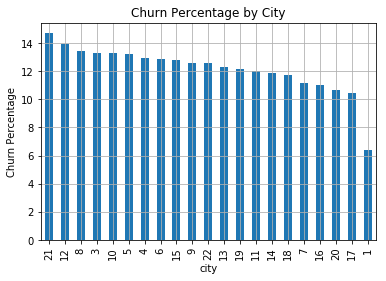

In [4]:
df=pd.crosstab(out['city'],out['is_churn'])
df.plot(kind='bar', stacked=True, grid=True)
df["Ratio"] =  df[1] / (df[0] + df[1])

plt.ylabel('Count')
plt.title('Churn by City')
plt.show()

df=df.sort_values('Ratio', ascending=False)
print(df)

df['Ratio'] = df['Ratio'] * 100
df['Ratio'].plot(kind='bar', stacked=True, grid=True)
plt.ylabel('Churn Percentage')
plt.title('Churn Percentage by City')
plt.show()

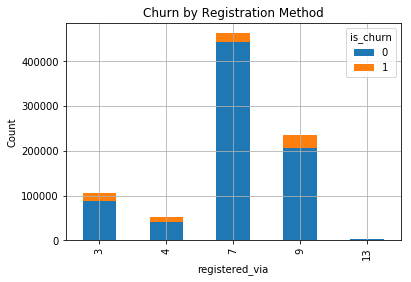

is_churn             0      1     Ratio
registered_via                         
3                88121  18338  0.172254
4                40559  12185  0.231022
7               441987  20697  0.044732
9               205796  29893  0.126832
13                3056    335  0.098791


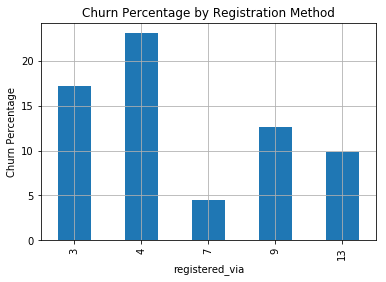

In [97]:
df=pd.crosstab(out['registered_via'],out['is_churn'])
df.plot(kind='bar', stacked=True, grid=True)
df["Ratio"] =  df[1] / (df[0] + df[1])

plt.ylabel('Count')
plt.title('Churn by Registration Method')
plt.show()

print(df)

df['Ratio'] = df['Ratio'] * 100
df['Ratio'].plot(kind='bar', stacked=True, grid=True)
plt.ylabel('Churn Percentage')
plt.title('Churn Percentage by Registration Method')
plt.show()

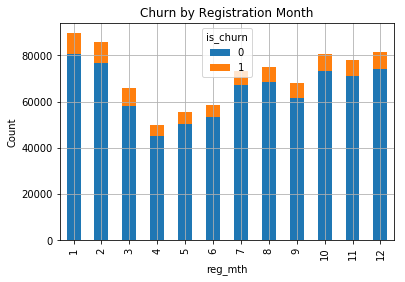

is_churn      0     1     Ratio
reg_mth                        
1         80691  8949  0.099833
2         76593  9035  0.105515
3         58027  7911  0.119976
4         45004  4728  0.095070
5         50419  5025  0.090632
6         53218  5364  0.091564
7         67361  5843  0.079818
8         68437  6631  0.088333
9         61383  6602  0.097110
10        73268  7260  0.090155
11        71233  6755  0.086616
12        73885  7345  0.090422


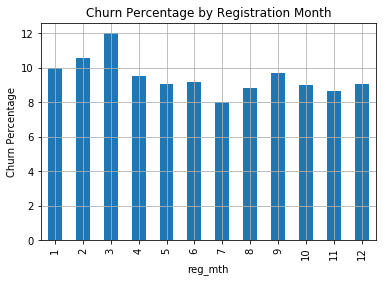

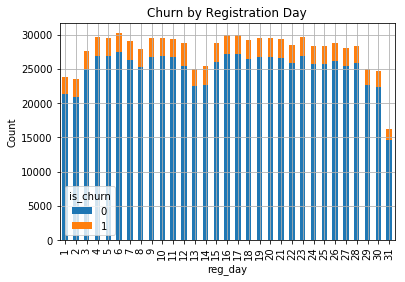

is_churn      0     1     Ratio
reg_day                        
1         21401  2402  0.100912
2         20904  2624  0.111527
3         24970  2651  0.095978
4         26899  2695  0.091066
5         26817  2677  0.090764
6         27498  2738  0.090554
7         26354  2708  0.093180
8         25338  2599  0.093031
9         26794  2668  0.090557
10        26914  2668  0.090190
11        26700  2634  0.089793
12        25444  3294  0.114622
13        22488  2564  0.102347
14        22586  2818  0.110927
15        25967  2782  0.096769
16        27196  2727  0.091134
17        27239  2708  0.090426
18        26465  2700  0.092577
19        26805  2727  0.092341
20        26757  2687  0.091258
21        26614  2720  0.092725
22        25884  2609  0.091566
23        26914  2711  0.091511
24        25787  2592  0.091335
25        25740  2570  0.090781
26        26141  2625  0.091254
27        25461  2610  0.092979
28        25886  2523  0.088810
29        22618  2407  0.096184
30      

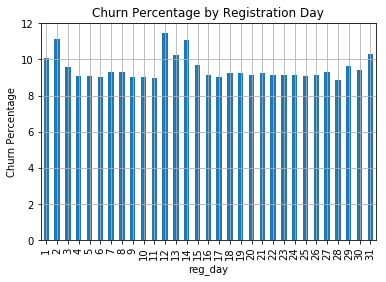

In [4]:
out['registration_init_time'] = pd.to_datetime(out['registration_init_time'], format='%Y-%m-%d')

out['reg_mth'] = out['registration_init_time'].dt.month

df=pd.crosstab(out['reg_mth'],out['is_churn'])
df.plot(kind='bar', stacked=True, grid=True)
df["Ratio"] =  df[1] / (df[0] + df[1])

plt.ylabel('Count')
plt.title('Churn by Registration Month')
plt.show()

print(df)

df['Ratio'] = df['Ratio'] * 100
df['Ratio'].plot(kind='bar', stacked=True, grid=True)
plt.ylabel('Churn Percentage')
plt.title('Churn Percentage by Registration Month')
plt.show()

out['reg_day'] = out['registration_init_time'].dt.day

day = out.groupby('reg_day').agg('count')
day['ratio'] = round((day['msno'] / 860967) * 100, 4)

df=pd.crosstab(out['reg_day'],out['is_churn'])
df.plot(kind='bar', stacked=True, grid=True)
df["Ratio"] =  df[1] / (df[0] + df[1])

plt.ylabel('Count')
plt.title('Churn by Registration Day')
plt.show()

print(df)

df['Ratio'] = df['Ratio'] * 100
df['Ratio'].plot(kind='bar', stacked=True, grid=True)
plt.ylabel('Churn Percentage')
plt.title('Churn Percentage by Registration Day')
plt.show()

In [157]:
c = pd.read_csv(output_path)
d = pd.read_csv(transactions_path)
d = d.dropna(axis=1,how='all')
merged = c.merge(d, on='msno')
merged.to_csv("trans_msr.csv", index=False)

In [158]:
trans_msr_path = '/Users/Pewelix/Documents/Data_Science/KKBox_Challenge/trans_msr.csv'
msr = pd.read_csv(trans_msr_path)

In [75]:
msr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016983 entries, 0 to 1016982
Data columns (total 15 columns):
msno                      1016983 non-null object
is_churn                  1016983 non-null int64
city                      1016983 non-null int64
registered_via            1016983 non-null int64
registration_init_time    1016983 non-null object
reg_mth                   1016983 non-null int64
reg_day                   1016983 non-null int64
payment_method_id         1016983 non-null int64
payment_plan_days         1016983 non-null int64
plan_list_price           1016983 non-null int64
actual_amount_paid        1016983 non-null int64
is_auto_renew             1016983 non-null int64
transaction_date          1016983 non-null int64
membership_expire_date    1016983 non-null int64
is_cancel                 1016983 non-null int64
dtypes: int64(13), object(2)
memory usage: 116.4+ MB


In [76]:
msr.duplicated().sum()

0

In [160]:
msr['msno'].duplicated().sum()

191615

In [161]:
df = msr.drop_duplicates(['msno', 'payment_method_id'])

In [162]:
df['msno'].duplicated().sum()

6798

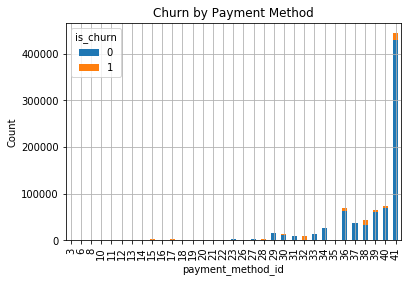

is_churn                0      1  Ratio
payment_method_id                      
3                       0      8  100.0
6                       0      5  100.0
8                       1      9   90.0
10                     34      4   10.5
11                     66      2    2.9
12                      7    206   96.7
13                      1    306   99.7
14                    449     10    2.2
15                    174   2047   92.2
16                    714    161   18.4
17                    223   1995   89.9
18                    589     22    3.6
19                    971     26    2.6
20                      5    841   99.4
21                    784     36    4.4
22                      2    486   99.6
23                   1984     57    2.8
26                     78    116   59.8
27                   1779     53    2.9
28                   1315    366   21.8
29                  14340   1244    8.0
30                  11541    921    7.4
31                   9645    150    1.5


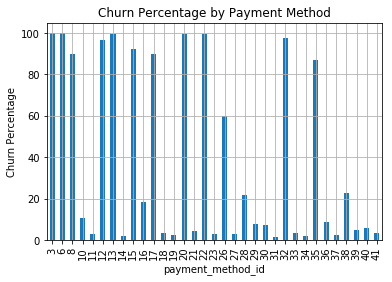

In [163]:
df=pd.crosstab(df['payment_method_id'],df['is_churn'])
df.plot(kind='bar', stacked=True, grid=True)
df["Ratio"] =  df[1] / (df[0] + df[1] + 0.00001)

plt.ylabel('Count')
plt.title('Churn by Payment Method')
plt.show()

df['Ratio'] = round(df['Ratio'] * 100,1)
df.sort_values('Ratio', ascending=False)

print(df)

df['Ratio'].plot(kind='bar', stacked=True, grid=True)
plt.ylabel('Churn Percentage')
plt.title('Churn Percentage by Payment Method')
plt.show()

In [164]:
df = msr.drop_duplicates(['msno', 'payment_plan_days'])

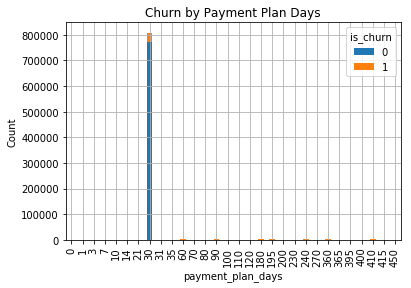

is_churn                0      1  Ratio
payment_plan_days                      
0                     748    286   27.7
1                      78    115   59.6
3                       0      3  100.0
7                     155    822   84.1
10                      8     62   88.6
14                     11     17   60.7
21                      0      1  100.0
30                 771192  37195    4.6
31                      0      1  100.0
35                      0      4  100.0
60                    417    991   70.4
70                      2     13   86.7
80                      0     10  100.0
90                    266   3549   93.0
100                     4    651   99.4
110                     0      9  100.0
120                    18    603   97.1
180                    24   2959   99.2
195                    22   2973   99.3
200                     2    276   99.3
230                     0      2  100.0
240                    31   1159   97.4
270                     0      9  100.0


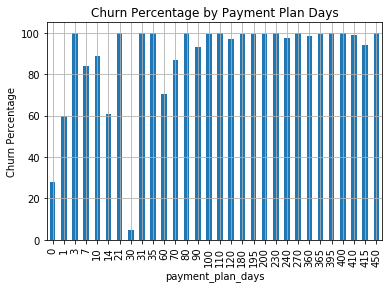

In [165]:
df=pd.crosstab(df['payment_plan_days'],df['is_churn'])
df.plot(kind='bar', stacked=True, grid=True)
df["Ratio"] =  df[1] / (df[0] + df[1] + 0.00001)

plt.ylabel('Count')
plt.title('Churn by Payment Plan Days')
plt.show()

df['Ratio'] = round(df['Ratio'] * 100,1)
df.sort_values('Ratio', ascending=False)

print(df)

df['Ratio'].plot(kind='bar', stacked=True, grid=True)
plt.ylabel('Churn Percentage')
plt.title('Churn Percentage by Payment Plan Days')
plt.show()

In [166]:
df = msr.drop_duplicates(['msno', 'plan_list_price'])

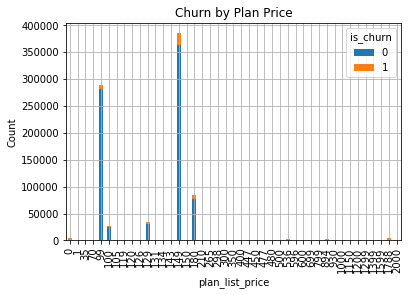

is_churn              0      1  Ratio
plan_list_price                      
0                  1172   3297   73.8
1                     0      2  100.0
35                   47     31   39.7
70                    1      1   50.0
99               282285   6737    2.3
100               25790    392    1.5
105                   0      1  100.0
119                 225     78   25.7
120                 123     10    7.5
126                   0      2  100.0
129               31361   2479    7.3
131                  15      1    6.2
134                  89      4    4.3
143                   1      0    0.0
149              364042  21010    5.5
150                1265    207   14.1
180               76974   7170    8.5
210                   0      1  100.0
265                   3      0    0.0
298                  14    751   98.2
300                 361   1128   75.8
350                   2     13   86.7
400                   0     10  100.0
447                   7    679   99.0
450         

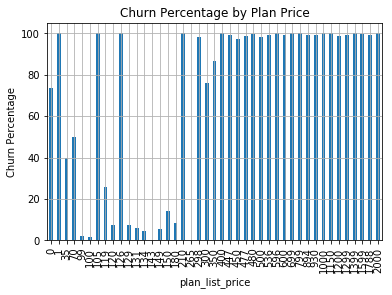

In [167]:
df=pd.crosstab(df['plan_list_price'],df['is_churn'])
df.plot(kind='bar', stacked=True, grid=True)
df["Ratio"] =  df[1] / (df[0] + df[1] + 0.00001)

plt.ylabel('Count')
plt.title('Churn by Plan Price')
plt.show()

df['Ratio'] = round(df['Ratio'] * 100,1)
df.sort_values('Ratio', ascending=False)

print(df)

df['Ratio'].plot(kind='bar', stacked=True, grid=True)
plt.ylabel('Churn Percentage')
plt.title('Churn Percentage by Plan Price')
plt.show()

In [168]:
df = msr.drop_duplicates(['msno', 'actual_amount_paid'])

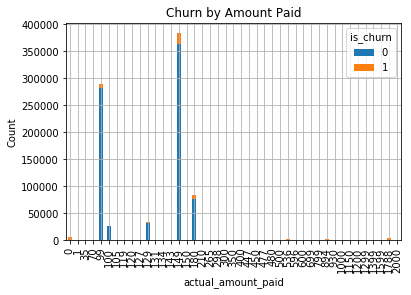

is_churn                 0      1  Ratio
actual_amount_paid                      
0                     1551   4021   72.2
1                        0      2  100.0
35                      47     31   39.7
70                       1      1   50.0
99                  282818   6748    2.3
100                  25790    392    1.5
105                      0      1  100.0
119                    490    192   28.2
120                    123      6    4.7
127                      0      2  100.0
129                  31553   2490    7.3
131                     15      1    6.2
134                     89      4    4.3
143                      1      0    0.0
149                 363172  20428    5.3
150                   1264    207   14.1
180                  76907   7133    8.5
210                      0      1  100.0
265                      3      0    0.0
298                     14    751   98.2
300                    361   1128   75.8
350                      2     13   86.7
400             

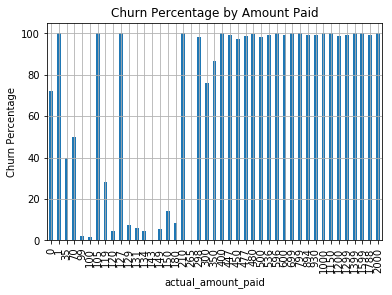

In [169]:
df=pd.crosstab(df['actual_amount_paid'],df['is_churn'])
df.plot(kind='bar', stacked=True, grid=True)
df["Ratio"] =  df[1] / (df[0] + df[1] + 0.00001)

plt.ylabel('Count')
plt.title('Churn by Amount Paid')
plt.show()

df['Ratio'] = round(df['Ratio'] * 100,1)
df.sort_values('Ratio', ascending=False)

print(df)

df['Ratio'].plot(kind='bar', stacked=True, grid=True)
plt.ylabel('Churn Percentage')
plt.title('Churn Percentage by Amount Paid')
plt.show()

In [170]:
df = msr.drop_duplicates(['msno', 'is_auto_renew'])

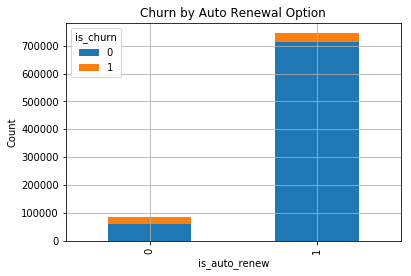

is_churn            0      1  Ratio
is_auto_renew                      
0               57866  25577   30.7
1              715263  29421    4.0


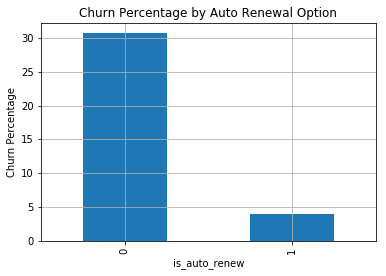

In [171]:
df=pd.crosstab(df['is_auto_renew'],df['is_churn'])
df.plot(kind='bar', stacked=True, grid=True)
df["Ratio"] =  df[1] / (df[0] + df[1] + 0.00001)

plt.ylabel('Count')
plt.title('Churn by Auto Renewal Option')
plt.show()

df['Ratio'] = round(df['Ratio'] * 100,1)
df.sort_values('Ratio', ascending=False)

print(df)

df['Ratio'].plot(kind='bar', stacked=True, grid=True)
plt.ylabel('Churn Percentage')
plt.title('Churn Percentage by Auto Renewal Option')
plt.show()

In [172]:
df = msr.drop_duplicates(['msno', 'is_cancel'])

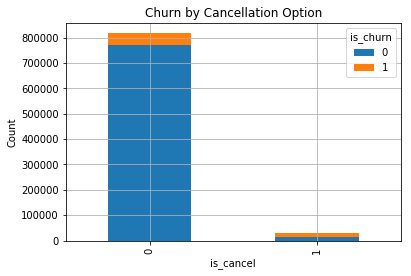

is_churn        0      1  Ratio
is_cancel                      
0          771081  45971    5.6
1           12496  16058   56.2


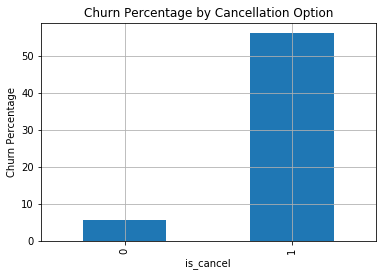

In [173]:
df=pd.crosstab(df['is_cancel'],df['is_churn'])
df.plot(kind='bar', stacked=True, grid=True)
df["Ratio"] =  df[1] / (df[0] + df[1] + 0.00001)

plt.ylabel('Count')
plt.title('Churn by Cancellation Option')
plt.show()

df['Ratio'] = round(df['Ratio'] * 100,1)
df.sort_values('Ratio', ascending=False)

print(df)

df['Ratio'].plot(kind='bar', stacked=True, grid=True)
plt.ylabel('Churn Percentage')
plt.title('Churn Percentage by Cancellation Option')
plt.show()

In [180]:
msr['transaction_date'] = pd.to_datetime(msr['transaction_date'], format='%Y-%m-%d')

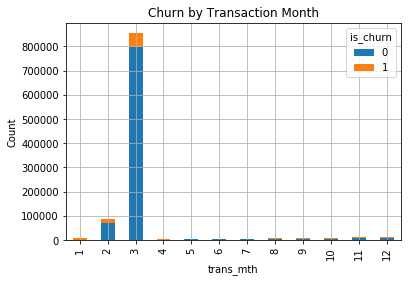

is_churn        0      1     Ratio
trans_mth                         
1            1685   6947  0.804796
2           71333  14454  0.168487
3          795658  59142  0.069188
4            2188    963  0.305617
5            2736   1258  0.314972
6            3268   1514  0.316604
7            3984   2570  0.392127
8            4603   2424  0.344955
9            5017   2666  0.347000
10           6227   3454  0.356781
11           7696   4238  0.355120
12           6953   6005  0.463420


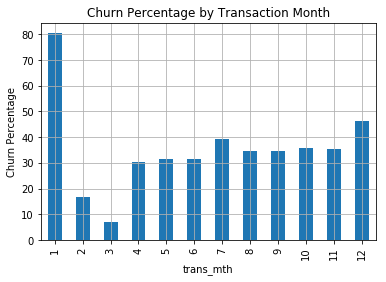

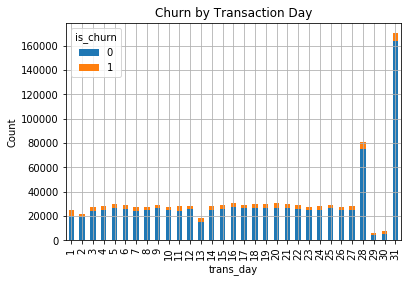

is_churn        0     1     Ratio
trans_day                        
1           19848  4883  0.197445
2           18875  2729  0.126319
3           24046  2836  0.105498
4           25080  3184  0.112652
5           26453  2941  0.100054
6           25987  3308  0.112920
7           24334  3143  0.114387
8           24678  2994  0.108196
9           26103  2935  0.101074
10          24661  2749  0.100292
11          24085  4369  0.153546
12          25210  2804  0.100093
13          14640  3639  0.199081
14          24604  3557  0.126309
15          25807  3456  0.118101
16          27402  3127  0.102427
17          26058  3127  0.107144
18          26465  3138  0.106003
19          26166  3627  0.121740
20          26324  4203  0.137681
21          26200  3654  0.122396
22          25714  3341  0.114989
23          24517  3006  0.109218
24          24603  3221  0.115763
25          26056  3056  0.104974
26          24687  2718  0.099179
27          25082  2993  0.106607
28          74

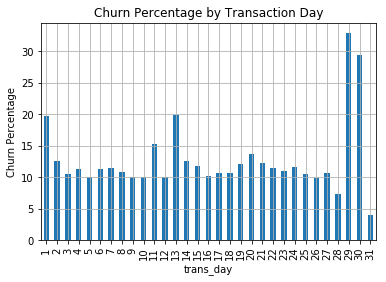

In [183]:
msr['trans_mth'] = msr['transaction_date'].dt.month

df=pd.crosstab(msr['trans_mth'],msr['is_churn'])
df.plot(kind='bar', stacked=True, grid=True)
df["Ratio"] =  df[1] / (df[0] + df[1])

plt.ylabel('Count')
plt.title('Churn by Transaction Month')
plt.show()

print(df)

df['Ratio'] = df['Ratio'] * 100
df['Ratio'].plot(kind='bar', stacked=True, grid=True)
plt.ylabel('Churn Percentage')
plt.title('Churn Percentage by Transaction Month')
plt.show()

msr['trans_day'] = msr['transaction_date'].dt.day

day = msr.groupby('trans_day').agg('count')
day['ratio'] = round((day['msno'] / 860967) * 100, 4)

df=pd.crosstab(msr['trans_day'],msr['is_churn'])
df.plot(kind='bar', stacked=True, grid=True)
df["Ratio"] =  df[1] / (df[0] + df[1])

plt.ylabel('Count')
plt.title('Churn by Transaction Day')
plt.show()

print(df)

df['Ratio'] = df['Ratio'] * 100
df['Ratio'].plot(kind='bar', stacked=True, grid=True)
plt.ylabel('Churn Percentage')
plt.title('Churn Percentage by Transaction Day')
plt.show()

In [188]:
msr.sort_values('membership_expire_date')
msr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016983 entries, 0 to 1016982
Data columns (total 23 columns):
msno                      1016983 non-null object
is_churn                  1016983 non-null int64
city                      1016983 non-null int64
registered_via            1016983 non-null int64
registration_init_time    1016983 non-null object
reg_mth                   1016983 non-null int64
reg_day                   1016983 non-null int64
payment_method_id         1016983 non-null int64
payment_plan_days         1016983 non-null int64
plan_list_price           1016983 non-null int64
actual_amount_paid        1016983 non-null int64
is_auto_renew             1016983 non-null int64
transaction_date          1016983 non-null datetime64[ns]
membership_expire_date    1016983 non-null object
is_cancel                 1016983 non-null int64
trans_mth                 1016983 non-null int64
trans_day                 1016983 non-null int64
exp_mth                   1016983 non-null

In [196]:
msr = msr.drop_duplicates(subset='msno', keep='last')
msr.head()

,msno,is_churn,city,registered_via,registration_init_time,reg_mth,reg_day,payment_method_id,payment_plan_days,plan_list_price,...,membership_expire_date,is_cancel,trans_mth,trans_day,exp_mth,exp_day,trans_count,discount,methods_used,plans_used
0,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,13,3,2013-12-23,12,23,36,30,180,...,2017-04-11,0,3,11,4,11,1,0,1,1
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,13,3,2013-12-27,12,27,15,90,300,...,2017-06-15,0,3,14,6,15,2,0,2,2
12,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,1,7,2014-01-09,1,9,41,30,149,...,2017-04-08,0,8,8,4,8,10,0,1,1
20,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1,13,7,2014-01-25,1,25,41,30,99,...,2017-09-18,0,3,16,9,18,8,0,1,1
21,ibIHVYBqxGwrSExE63/omeDD99M5vYB3CN2HzkEY+eM=,1,22,3,2014-01-26,1,26,40,30,149,...,2017-03-14,1,3,16,3,14,1,0,1,1


In [266]:
msr['percent_off'] = round((msr['discount'] / msr['plan_list_price']) * 100, 1)

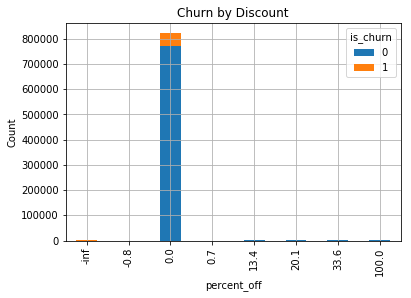

is_churn          0      1  Ratio
percent_off                      
-inf             47     33   41.2
-0.800000         0      2  100.0
 0.000000    769847  51173    6.2
 0.700000         1      0    0.0
 13.400000      186     11    5.6
 20.100000       82     49   37.4
 33.600000      525      9    1.7
 100.000000     711    861   54.8


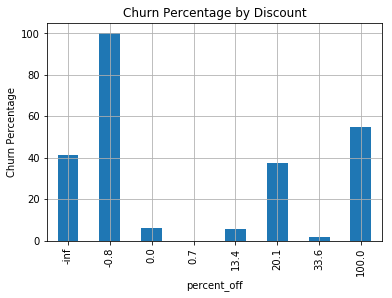

In [267]:
df=pd.crosstab(msr['percent_off'],msr['is_churn'])
df.plot(kind='bar', stacked=True, grid=True)
df["Ratio"] =  df[1] / (df[0] + df[1] + 0.00001)

plt.ylabel('Count')
plt.title('Churn by Discount')
plt.show()

df['Ratio'] = round(df['Ratio'] * 100,1)
df.sort_values('Ratio', ascending=False)

print(df)

df['Ratio'].plot(kind='bar', stacked=True, grid=True)
plt.ylabel('Churn Percentage')
plt.title('Churn Percentage by Discount')
plt.show()

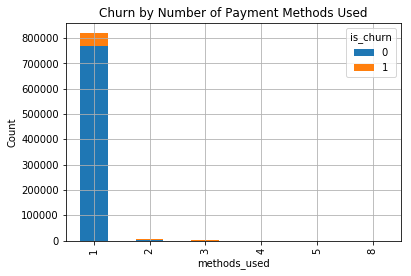

is_churn           0      1  Ratio
methods_used                      
1             768558  50274    6.1
2               2970   3316   52.8
3                 62    181   74.5
4                  1      4   80.0
5                  0      1  100.0
8                  0      1  100.0


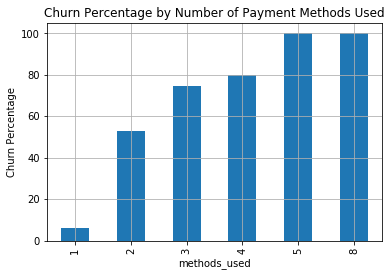

In [270]:
df=pd.crosstab(msr['methods_used'],msr['is_churn'])
df.plot(kind='bar', stacked=True, grid=True)
df["Ratio"] =  df[1] / (df[0] + df[1] + 0.00001)

plt.ylabel('Count')
plt.title('Churn by Number of Payment Methods Used')
plt.show()

df['Ratio'] = round(df['Ratio'] * 100,1)
df.sort_values('Ratio', ascending=False)

print(df)

df['Ratio'].plot(kind='bar', stacked=True, grid=True)
plt.ylabel('Churn Percentage')
plt.title('Churn Percentage by Number of Payment Methods Used')
plt.show()

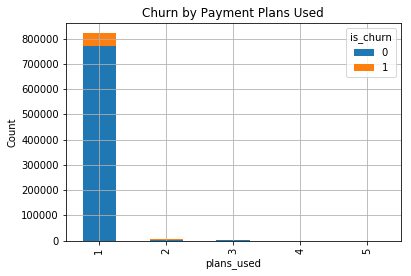

is_churn         0      1  Ratio
plans_used                      
1           770257  49899    6.1
2             1229   3389   73.4
3               90    436   82.9
4               15     50   76.9
5                0      3  100.0


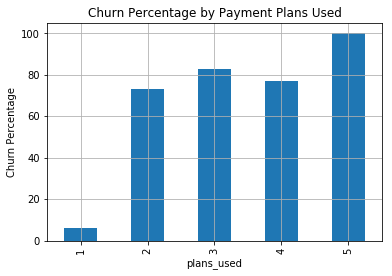

In [271]:
df=pd.crosstab(msr['plans_used'],msr['is_churn'])
df.plot(kind='bar', stacked=True, grid=True)
df["Ratio"] =  df[1] / (df[0] + df[1] + 0.00001)

plt.ylabel('Count')
plt.title('Churn by Payment Plans Used')
plt.show()

df['Ratio'] = round(df['Ratio'] * 100,1)
df.sort_values('Ratio', ascending=False)

print(df)

df['Ratio'].plot(kind='bar', stacked=True, grid=True)
plt.ylabel('Churn Percentage')
plt.title('Churn Percentage by Payment Plans Used')
plt.show()

In [198]:
msr['membership_expire_date'] = pd.to_datetime(msr['membership_expire_date'], format='%Y-%m-%d')
msr['registration_init_time'] = pd.to_datetime(msr['registration_init_time'], format='%Y-%m-%d')

msr['mbr_time'] = msr['membership_expire_date'] - msr['registration_init_time']

In [208]:
msr['mbr_time'] = msr['mbr_time'].dt.days

In [210]:
df = msr[['msno', 'mbr_time']]
df.head()

,msno,mbr_time
0,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1205
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1266
12,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1185
20,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1332
21,ibIHVYBqxGwrSExE63/omeDD99M5vYB3CN2HzkEY+eM=,1143


In [211]:
df.to_csv("mbr_time.csv", index=False)
mbr_time_path = '/Users/Pewelix/Documents/Data_Science/KKBox_Challenge/mbr_time.csv'

In [215]:
c = pd.read_csv(trans_msr_path)
d = pd.read_csv(mbr_time_path)
d = d.dropna(axis=1,how='all')
merged = c.merge(d, on='msno')
merged.to_csv("trans_msr.csv", index=False)

In [16]:
trans_msr_path = '/Users/Pewelix/Documents/Data_Science/KKBox_Challenge/trans_msr.csv'
x = pd.read_csv(trans_msr_path)

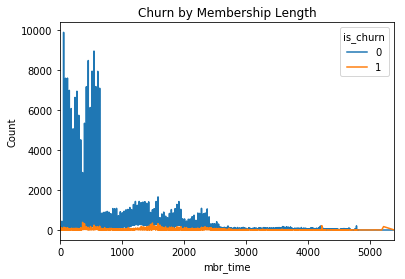

is_churn    0    1  Ratio
mbr_time                 
-7          1    0    0.0
 0        151    6    3.8
 1         19   11   36.7
 2          4    2   33.3
 3         25  171   87.2
 4         11   23   67.6
 5          7   10   58.8
 6         24  132   84.6
 7          8   39   83.0
 8         10   32   76.2
 9          5   18   78.3
 10         5   21   80.8
 11         6   11   64.7
 12         0    7  100.0
 13         4    8   66.7
 14         4   13   76.5
 15         5    9   64.3
 16         0    8  100.0
 17         2    1   33.3
 18         4    8   66.7
 19         5    9   64.3
 20         5   11   68.7
 21         2    8   80.0
 22         3    5   62.5
 23         9   42   82.4
 24         7   13   65.0
 25         8    9   52.9
 26         2   33   94.3
 27        16   42   72.4
 28        17   10   37.0
...       ...  ...    ...
 5049       0    1  100.0
 5053       0    1  100.0
 5087       0   11  100.0
 5103       0    1  100.0
 5106       0    2  100.0
 5107       

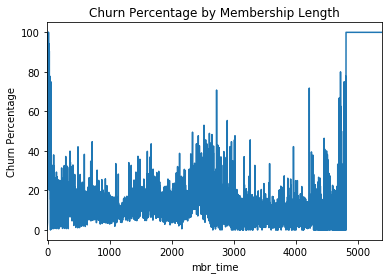

In [18]:
df=pd.crosstab(x['mbr_time'],x['is_churn'])
df.plot()
df["Ratio"] =  df[1] / (df[0] + df[1] + 0.00001)

plt.ylabel('Count')
plt.title('Churn by Membership Length')
plt.show()

df['Ratio'] = round(df['Ratio'] * 100,1)
df.sort_values('Ratio', ascending=False)

print(df)

df['Ratio'].plot()
plt.ylabel('Churn Percentage')
plt.title('Churn Percentage by Membership Length')
plt.show()

     mbr_time  Ratio
0         -10    0.0
1           0  609.5
2          10  717.3
3          20  705.7
4          30  426.5
5          40  367.8
6          50  351.4
7          60  175.2
8          70  208.3
9          80  167.5
10         90  168.9
11        100  211.2
12        110  127.9
13        120  119.3
14        130  178.0
15        140  188.7
16        150  121.6
17        160  158.8
18        170  181.8
19        180  127.1
20        190  180.6
21        200  190.5
22        210   99.1
23        220  175.4
24        230  152.4
25        240  106.0
26        250  148.5
27        260  166.5
28        270  103.6
29        280  128.7
..        ...    ...
486      4850  200.0
487      4860  100.0
488      4880  300.0
489      4900  700.0
490      4910  700.0
491      4920  700.0
492      4930  500.0
493      4940  400.0
494      4950  700.0
495      4960  500.0
496      4970  200.0
497      4980  400.0
498      4990  200.0
499      5000  400.0
500      5010  300.0
501      5020

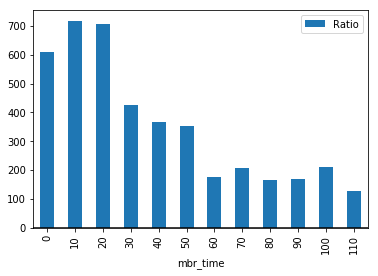

In [23]:
df['mbr_time'] = df.index

new = pd.DataFrame({'mbr_time':range(0, int(round(df.mbr_time.max() / 500) * 10) + 10, 10)})

(pd.merge(new, df.groupby(df.mbr_time//10*10)['Ratio'].sum().reset_index(),
          how='left')
   .fillna(0)
   .set_index('mbr_time')
   .plot.bar()
)
plt.axhline(0, color='k')
print(df.groupby(df.mbr_time//10*10)['Ratio'].sum().reset_index())
plt.show()

In [219]:
x.sort_values('membership_expire_date')
x = x.drop_duplicates(subset='msno', keep='last')
x.to_csv("working.csv", index=False)

In [4]:
working_path = '/Users/Pewelix/Documents/Data_Science/KKBox_Challenge/working.csv'
c = pd.read_csv(working_path)
d = pd.read_csv(user_logs_path)
d = d.dropna(axis=1,how='all')
merged = c.merge(d, on='msno')
merged.to_csv("master.csv", index=False)

In [24]:
master_path = '/Users/Pewelix/Documents/Data_Science/KKBox_Challenge/master.csv'
m = pd.read_csv(master_path)

In [13]:
df = m.groupby('msno')['total_secs'].agg('sum')

In [34]:
df = df.reset_index()

In [35]:
df.head()

,msno,total_secs
0,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,192527.892
1,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,115411.260
2,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,149896.558
3,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,116433.247
4,++/UDNo9DLrxT8QVGiDi1OnWfczAdEwThaVyD0fXO50=,36636.638


In [36]:
df.to_csv('/Users/Pewelix/Documents/Data_Science/KKBox_Challenge/total_time.csv')

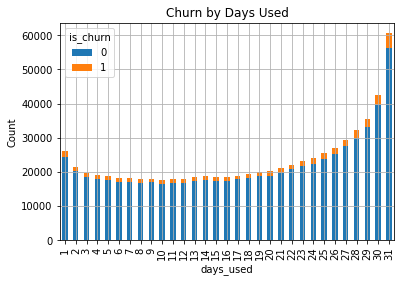

is_churn       0     1  Ratio
days_used                    
1          24482  1681    6.4
2          20202  1356    6.3
3          18503  1226    6.2
4          17934  1160    6.1
5          17518  1219    6.5
6          16978  1117    6.2
7          17010  1126    6.2
8          16744  1122    6.3
9          16931  1051    5.8
10         16498  1065    6.1
11         16726  1071    6.0
12         16789  1049    5.9
13         17343  1091    5.9
14         17520  1135    6.1
15         17418  1099    5.9
16         17186  1191    6.5
17         17810  1081    5.7
18         18082  1203    6.2
19         18647  1274    6.4
20         18891  1278    6.3
21         19767  1284    6.1
22         20699  1350    6.1
23         21573  1479    6.4
24         22398  1529    6.4
25         23822  1660    6.5
26         25327  1766    6.5
27         27455  1879    6.4
28         29964  2192    6.8
29         33133  2437    6.9
30         39483  3073    7.2
31         56286  4359    7.2


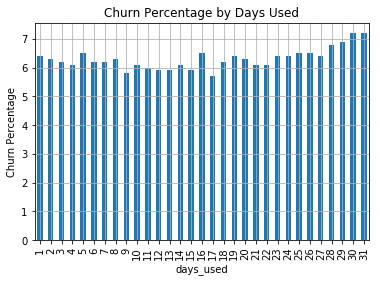

In [241]:
df=pd.crosstab(m['days_used'],m['is_churn'])
df.plot(kind='bar', stacked=True, grid=True)
df["Ratio"] =  df[1] / (df[0] + df[1] + 0.00001)

plt.ylabel('Count')
plt.title('Churn by Days Used')
plt.show()

df['Ratio'] = round(df['Ratio'] * 100,1)
df.sort_values('Ratio', ascending=False)

print(df)

df['Ratio'].plot(kind='bar', stacked=True, grid=True)
plt.ylabel('Churn Percentage')
plt.title('Churn Percentage by Days Used')
plt.show()

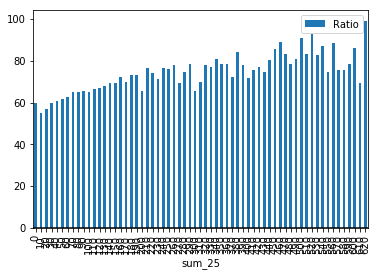

In [40]:
df=pd.crosstab(m['sum_25'],m['is_churn'])
#df.plot()
df["Ratio"] =  df[1] / (df[0] + df[1] + 0.00001)

#plt.ylabel('Count')
#plt.title('Churn by Total # songs played at 25% song length')
#plt.show()

df['Ratio'] = round(df['Ratio'] * 100,1)
df.sort_values('Ratio', ascending=False)

#print(df)

#df['Ratio'].plot()
#plt.ylabel('Churn Percentage')
#plt.title('Churn Percentage by Total # songs played at 25% song length')
#plt.show()

df['sum_25'] = df.index

new = pd.DataFrame({'sum_25':range(0, int(round(df.sum_25.max() / 750) * 10) + 10, 10)})

(pd.merge(new, df.groupby(df.sum_25//10*10)['Ratio'].sum().reset_index(),
          how='left')
   .fillna(0)
   .set_index('sum_25')
   .plot.bar()
)
plt.axhline(0, color='k')
df.groupby(df.sum_25//10*10)['Ratio'].sum().reset_index()
plt.show()

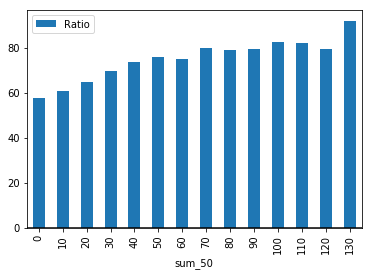

In [39]:
df=pd.crosstab(m['sum_50'],m['is_churn'])
#df.plot()
df["Ratio"] =  df[1] / (df[0] + df[1] + 0.00001)

#plt.ylabel('Count')
#plt.title('Churn by Total # songs played at 25% song length')
#plt.show()

df['Ratio'] = round(df['Ratio'] * 100,1)
df.sort_values('Ratio', ascending=False)

#print(df)

#df['Ratio'].plot()
#plt.ylabel('Churn Percentage')
#plt.title('Churn Percentage by Total # songs played at 25% song length')
#plt.show()

df['sum_50'] = df.index

new = pd.DataFrame({'sum_50':range(0, int(round(df.sum_50.max() / 250) * 10) + 10, 10)})

(pd.merge(new, df.groupby(df.sum_50//10*10)['Ratio'].sum().reset_index(),
          how='left')
   .fillna(0)
   .set_index('sum_50')
   .plot.bar()
)
plt.axhline(0, color='k')
df.groupby(df.sum_50//10*10)['Ratio'].sum().reset_index()
plt.show()

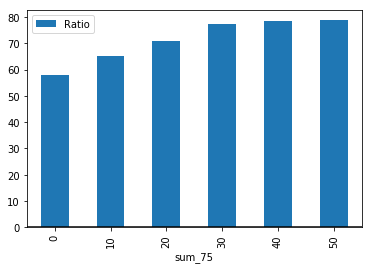

In [43]:
df=pd.crosstab(m['sum_75'],m['is_churn'])
#df.plot()
df["Ratio"] =  df[1] / (df[0] + df[1] + 0.00001)

#plt.ylabel('Count')
#plt.title('Churn by Total # songs played at 25% song length')
#plt.show()

df['Ratio'] = round(df['Ratio'] * 100,1)
df.sort_values('Ratio', ascending=False)

#print(df)

#df['Ratio'].plot()
#plt.ylabel('Churn Percentage')
#plt.title('Churn Percentage by Total # songs played at 25% song length')
#plt.show()

df['sum_75'] = df.index

new = pd.DataFrame({'sum_75':range(0, int(round(df.sum_75.max() / 250) * 10) + 10, 10)})

(pd.merge(new, df.groupby(df.sum_75//10*10)['Ratio'].sum().reset_index(),
          how='left')
   .fillna(0)
   .set_index('sum_75')
   .plot.bar()
)
plt.axhline(0, color='k')
df.groupby(df.sum_75//10*10)['Ratio'].sum().reset_index()
plt.show()

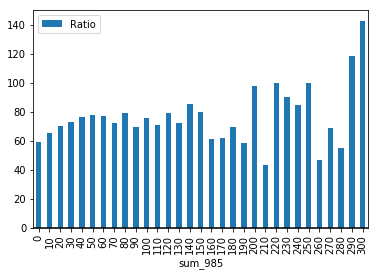

In [45]:
df=pd.crosstab(m['sum_985'],m['is_churn'])
#df.plot()
df["Ratio"] =  df[1] / (df[0] + df[1] + 0.00001)

#plt.ylabel('Count')
#plt.title('Churn by Total # songs played at 25% song length')
#plt.show()

df['Ratio'] = round(df['Ratio'] * 100,1)
df.sort_values('Ratio', ascending=False)

#print(df)

#df['Ratio'].plot()
#plt.ylabel('Churn Percentage')
#plt.title('Churn Percentage by Total # songs played at 25% song length')
#plt.show()

df['sum_985'] = df.index

new = pd.DataFrame({'sum_985':range(0, int(round(df.sum_985.max() / 500) * 10) + 10, 10)})

(pd.merge(new, df.groupby(df.sum_985//10*10)['Ratio'].sum().reset_index(),
          how='left')
   .fillna(0)
   .set_index('sum_985')
   .plot.bar()
)
plt.axhline(0, color='k')
df.groupby(df.sum_985//10*10)['Ratio'].sum().reset_index()
plt.show()

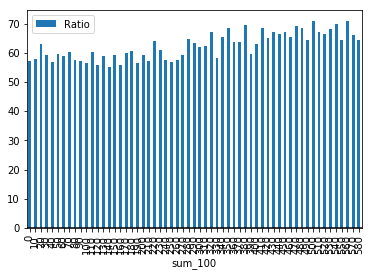

In [52]:
df=pd.crosstab(m['sum_100'],m['is_churn'])
#df.plot()
df["Ratio"] =  df[1] / (df[0] + df[1] + 0.00001)

#plt.ylabel('Count')
#plt.title('Churn by Total # songs played at 25% song length')
#plt.show()

df['Ratio'] = round(df['Ratio'] * 100,1)
df.sort_values('Ratio', ascending=False)

#print(df)

#df['Ratio'].plot()
#plt.ylabel('Churn Percentage')
#plt.title('Churn Percentage by Total # songs played at 25% song length')
#plt.show()

df['sum_100'] = df.index

new = pd.DataFrame({'sum_100':range(0, int(round(df.sum_100.max() / 1000) * 10) + 10, 10)})

(pd.merge(new, df.groupby(df.sum_100//10*10)['Ratio'].sum().reset_index(),
          how='left')
   .fillna(0)
   .set_index('sum_100')
   .plot.bar()
)
plt.axhline(0, color='k')
df.groupby(df.sum_100//10*10)['Ratio'].sum().reset_index()
plt.show()

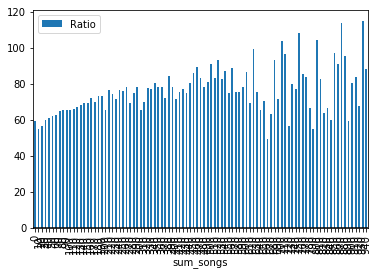

In [33]:
df=pd.crosstab(m['sum_songs'],m['is_churn'])
df.plot()
df["Ratio"] =  df[1] / (df[0] + df[1] + 0.00001)

#plt.ylabel('Count')
#plt.title('Churn by Total Songs Played')
#plt.show()

df['Ratio'] = round(df['Ratio'] * 100,1)
df.sort_values('Ratio', ascending=False)

#print(df)

#df['Ratio'].plot()
#plt.ylabel('Churn Percentage')
#plt.title('Churn Percentage by Total Songs Played')
#plt.show()

df['sum_songs'] = df.index

new = pd.DataFrame({'sum_songs':range(0, int(round(df.sum_songs.max() / 500) * 10) + 10, 10)})

(pd.merge(new, df.groupby(df.sum_songs//10*10)['Ratio'].sum().reset_index(),
          how='left')
   .fillna(0)
   .set_index('sum_songs')
   .plot.bar()
)
plt.axhline(0, color='k')
print(df.groupby(df.sum_songs//10*10)['Ratio'].sum().reset_index())
plt.show()

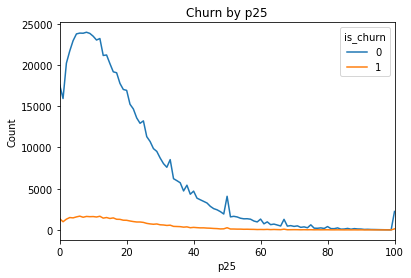

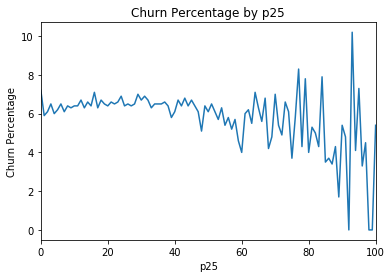

In [261]:
df=pd.crosstab(m['p25'],m['is_churn'])
df.plot()
df["Ratio"] =  df[1] / (df[0] + df[1] + 0.00001)

plt.ylabel('Count')
plt.title('Churn by p25')
plt.show()

df['Ratio'] = round(df['Ratio'] * 100,1)
df.sort_values('Ratio', ascending=False)

#print(df)

df['Ratio'].plot()
plt.ylabel('Churn Percentage')
plt.title('Churn Percentage by p25')
plt.show()

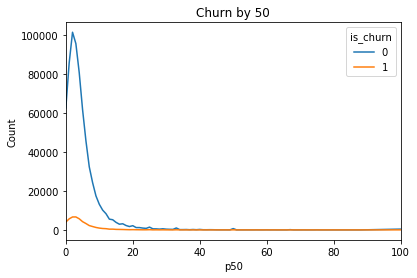

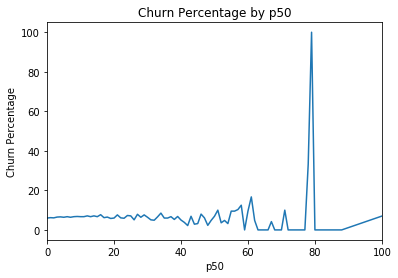

In [251]:
df=pd.crosstab(m['p50'],m['is_churn'])
df.plot()
df["Ratio"] =  df[1] / (df[0] + df[1] + 0.00001)

plt.ylabel('Count')
plt.title('Churn by 50')
plt.show()

df['Ratio'] = round(df['Ratio'] * 100,1)
df.sort_values('Ratio', ascending=False)

#print(df)

df['Ratio'].plot()
plt.ylabel('Churn Percentage')
plt.title('Churn Percentage by p50')
plt.show()

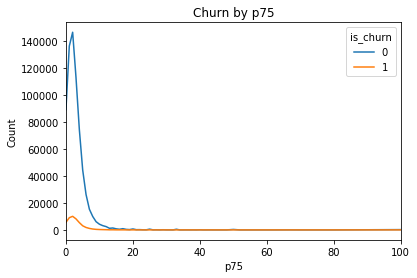

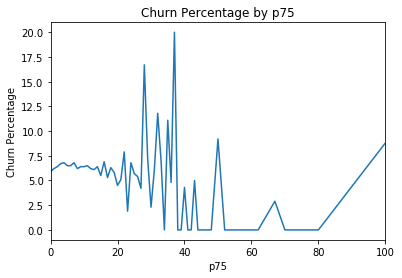

In [252]:
df=pd.crosstab(m['p75'],m['is_churn'])
df.plot()
df["Ratio"] =  df[1] / (df[0] + df[1] + 0.00001)

plt.ylabel('Count')
plt.title('Churn by p75')
plt.show()

df['Ratio'] = round(df['Ratio'] * 100,1)
df.sort_values('Ratio', ascending=False)

#print(df)

df['Ratio'].plot()
plt.ylabel('Churn Percentage')
plt.title('Churn Percentage by p75')
plt.show()

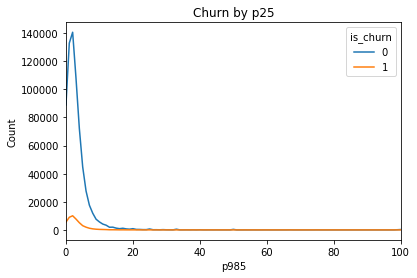

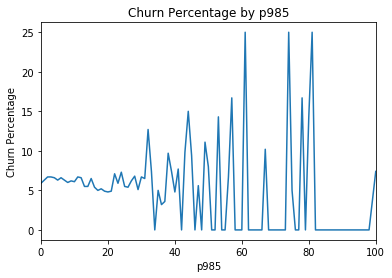

In [253]:
df=pd.crosstab(m['p985'],m['is_churn'])
df.plot()
df["Ratio"] =  df[1] / (df[0] + df[1] + 0.00001)

plt.ylabel('Count')
plt.title('Churn by p25')
plt.show()

df['Ratio'] = round(df['Ratio'] * 100,1)
df.sort_values('Ratio', ascending=False)

#print(df)

df['Ratio'].plot()
plt.ylabel('Churn Percentage')
plt.title('Churn Percentage by p985')
plt.show()

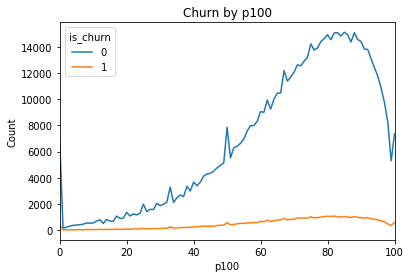

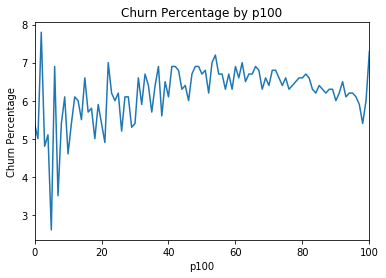

In [254]:
df=pd.crosstab(m['p100'],m['is_churn'])
df.plot()
df["Ratio"] =  df[1] / (df[0] + df[1] + 0.00001)

plt.ylabel('Count')
plt.title('Churn by p100')
plt.show()

df['Ratio'] = round(df['Ratio'] * 100,1)
df.sort_values('Ratio', ascending=False)

#print(df)

df['Ratio'].plot()
plt.ylabel('Churn Percentage')
plt.title('Churn Percentage by p100')
plt.show()

In [54]:
m.columns

Index(['Unnamed: 0_x', 'msno', 'is_churn', 'city', 'registered_via',
       'registration_init_time', 'reg_mth', 'reg_day', 'payment_method_id',
       'payment_plan_days', 'plan_list_price', 'actual_amount_paid',
       'is_auto_renew', 'transaction_date', 'membership_expire_date',
       'is_cancel', 'trans_mth', 'trans_day', 'exp_mth', 'exp_day',
       'trans_count', 'discount', 'methods_used', 'plans_used', 'mbr_time',
       'date', 'total_secs_x', 'days_used', 'total_day', 'fav_songs', 'sum_25',
       'sum_50', 'sum_75', 'sum_985', 'sum_100', 'sum_songs', 'p25', 'p50',
       'p75', 'p985', 'p100', 'total_time', 'Unnamed: 0_y', 'total_secs_y'],
      dtype='object')

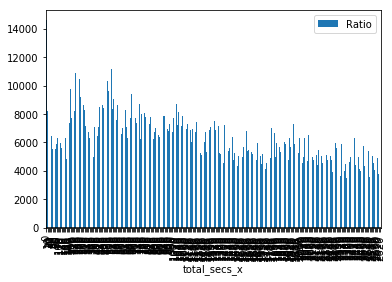

In [58]:
df=pd.crosstab(m['total_secs_x'],m['is_churn'])
#df.plot()
df["Ratio"] =  df[1] / (df[0] + df[1] + 0.00001)

#plt.ylabel('Count')
#plt.title('Churn by Total Songs Played')
#plt.show()

df['Ratio'] = round(df['Ratio'] * 100,1)
df.sort_values('Ratio', ascending=False)

#print(df)

#df['Ratio'].plot()
#plt.ylabel('Churn Percentage')
#plt.title('Churn Percentage by Total Songs Played')
#plt.show()

df['total_secs_x'] = df.index

new = pd.DataFrame({'total_secs_x':range(0, int(round(df.total_secs_x.max() / 2500) * 10) + 10, 10)})

(pd.merge(new, df.groupby(df.total_secs_x//10*10)['Ratio'].sum().reset_index(),
          how='left')
   .fillna(0)
   .set_index('total_secs_x')
   .plot.bar()
)
plt.axhline(0, color='k')
df.groupby(df.total_secs_x//10*10)['Ratio'].sum().reset_index()
plt.show()

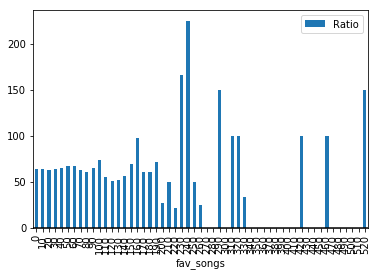

In [63]:
df=pd.crosstab(m['fav_songs'],m['is_churn'])
#df.plot()
df["Ratio"] =  df[1] / (df[0] + df[1] + 0.00001)

#plt.ylabel('Count')
#plt.title('Churn by Total Songs Played')
#plt.show()

df['Ratio'] = round(df['Ratio'] * 100,1)
df.sort_values('Ratio', ascending=False)

#print(df)

#df['Ratio'].plot()
#plt.ylabel('Churn Percentage')
#plt.title('Churn Percentage by Total Songs Played')
#plt.show()

df['fav_songs'] = df.index

new = pd.DataFrame({'fav_songs':range(0, int(round(df.fav_songs.max() / 50) * 10) + 10, 10)})

(pd.merge(new, df.groupby(df.fav_songs//10*10)['Ratio'].sum().reset_index(),
          how='left')
   .fillna(0)
   .set_index('fav_songs')
   .plot.bar()
)
plt.axhline(0, color='k')
df.groupby(df.fav_songs//10*10)['Ratio'].sum().reset_index()
plt.show()

In [16]:
del m['num_25']
del m['num_50']
del m['num_75']
del m['num_985']
del m['num_100']
del m['num_unq']
del m['Unnamed: 0']

In [20]:
m = m.sort_values('date')
m = m.drop_duplicates(subset='msno', keep='last')
m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 725722 entries, 5813668 to 2095883
Data columns (total 41 columns):
msno                      725722 non-null object
is_churn                  725722 non-null int64
city                      725722 non-null int64
registered_via            725722 non-null int64
registration_init_time    725722 non-null object
reg_mth                   725722 non-null int64
reg_day                   725722 non-null int64
payment_method_id         725722 non-null int64
payment_plan_days         725722 non-null int64
plan_list_price           725722 non-null int64
actual_amount_paid        725722 non-null int64
is_auto_renew             725722 non-null int64
transaction_date          725722 non-null object
membership_expire_date    725722 non-null object
is_cancel                 725722 non-null int64
trans_mth                 725722 non-null int64
trans_day                 725722 non-null int64
exp_mth                   725722 non-null int64
exp_day       

In [31]:
m.to_csv('master.csv')

In [32]:
master_path = '/Users/Pewelix/Documents/Data_Science/KKBox_Challenge/master.csv'
m = pd.read_csv(master_path)

In [37]:
time_path = '/Users/Pewelix/Documents/Data_Science/KKBox_Challenge/total_time.csv'

c = pd.read_csv(master_path)
d = pd.read_csv(time_path)
d = d.dropna(axis=1,how='all')
merged = c.merge(d, on='msno')
merged.to_csv("master.csv", index=False)

In [38]:
master_path = '/Users/Pewelix/Documents/Data_Science/KKBox_Challenge/master.csv'
m = pd.read_csv(master_path)